#Importing Data for Analysis

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [142]:
AutoCustomer_df = pd.read_csv('customer-data.csv')
AutoCustomer_df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True


In [143]:
AutoCustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

Our dataset contains 10,000 observations(rows) and 19 columns(features). The variable types are object(8), integer(5), float(2) and boolean(4).

In [144]:
AutoCustomer_df.shape

(10000, 19)

In [145]:
AutoCustomer_df.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000


# Data cleaning

## First we drop columns that will not be included in this analysis.

In [146]:
AutoCustomer_df.drop(columns =['id','postal_code','race'], inplace = True)
AutoCustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         9018 non-null   float64
 6   vehicle_ownership    10000 non-null  bool   
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  bool   
 9   children             10000 non-null  bool   
 10  annual_mileage       9043 non-null   float64
 11  vehicle_type         10000 non-null  object 
 12  speeding_violations  10000 non-null  int64  
 13  DUIs                 10000 non-null  int64  
 14  past_accidents       10000 non-null  int64  
 15  outcome              10000 non-null  

The id variable is a unique identifier for the dataset and does not add to this analysis. Postal code and race is also removed because the variables will not be included in the attributes used to cluster the customers.

#Missing Values

## We explore our missing values and handle missing values using any of the techniques in data analysis as it is applicable to the variable.

In [147]:
AutoCustomer_df.isnull().sum()

age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

Our data has some missing values. 'Credit_score' and 'annual_mileage' are missing some values and this may impact our analysis.

# Credit Score missing value will be replaced by the mean credit score based on the logical assumption that no individual has a 'zero' credit score.

In [148]:
AutoCustomer_df['credit_score'] = AutoCustomer_df['credit_score'].fillna(AutoCustomer_df['credit_score'].mean())
AutoCustomer_df['credit_score'].isnull().sum()

0

Annual Mileage missing value will also be replaced by the mean annual mileage in the dataset based on the logical assumption that customers with auto insurance have taken out policy with the intention to drive so mileage cannot be zero over a period of time.

In [149]:
AutoCustomer_df['annual_mileage'] = AutoCustomer_df['annual_mileage'].fillna(AutoCustomer_df['annual_mileage'].mean())
AutoCustomer_df['annual_mileage'].isnull().sum()

0

In [150]:
AutoCustomer_df.isnull().sum()

age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

The missing values have been handled and the above shows that there's no longer missing values in the dataset.

Duplicate Rows

In [151]:
AutoCustomer_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [152]:
AutoCustomer_df.duplicated().sum()

24

In [153]:
AutoCustomer_df.loc[AutoCustomer_df.duplicated(), :]

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
911,16-25,male,0-9y,high school,poverty,0.515813,False,before 2015,False,False,11000.000000,sedan,0,0,0,True
2370,16-25,female,0-9y,high school,poverty,0.515813,False,before 2015,False,False,14000.000000,sedan,0,0,0,False
2756,16-25,male,0-9y,none,poverty,0.515813,False,before 2015,False,False,13000.000000,sedan,0,0,0,True
2921,16-25,male,0-9y,high school,poverty,0.515813,False,before 2015,False,True,11697.003207,sedan,0,0,0,True
3200,16-25,male,0-9y,high school,poverty,0.515813,False,before 2015,False,True,11697.003207,sedan,0,0,0,True
3997,16-25,female,0-9y,high school,poverty,0.515813,True,before 2015,False,True,9000.000000,sedan,0,0,0,True
4457,16-25,male,0-9y,none,poverty,0.515813,False,before 2015,False,False,13000.000000,sedan,0,0,0,True
5605,16-25,female,0-9y,none,poverty,0.515813,False,before 2015,False,False,11697.003207,sedan,0,0,0,True
5945,40-64,female,0-9y,university,upper class,0.515813,True,before 2015,True,True,13000.000000,sedan,0,0,0,False
6026,16-25,female,0-9y,high school,poverty,0.515813,False,before 2015,False,False,11697.003207,sedan,0,0,0,True


From the above returned table, we see that the rows are not exactly the same. This was returned because the credit score and vehicle type are the same. We will ignore this as it doesn't impact our analysis since the rows are not the same, other columns contain varying data.

In [154]:
AutoCustomer_df.describe(include = 'all').round(2)

,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
count,10000,10000,10000,10000,10000,10000.00,10000,10000,10000,10000,10000.00,10000,10000.00,10000.00,10000.00,10000
unique,4,2,4,3,4,NaN,2,2,2,2,NaN,2,NaN,NaN,NaN,2
top,26-39,female,0-9y,high school,upper class,NaN,True,before 2015,False,True,NaN,sedan,NaN,NaN,NaN,False
freq,3063,5010,3530,4157,4336,NaN,6970,6967,5018,6888,NaN,9523,NaN,NaN,NaN,6867
mean,NaN,NaN,NaN,NaN,NaN,0.52,NaN,NaN,NaN,NaN,11697.00,NaN,1.48,0.24,1.06,NaN
std,NaN,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN,NaN,2680.17,NaN,2.24,0.55,1.65,NaN
min,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,2000.00,NaN,0.00,0.00,0.00,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.43,NaN,NaN,NaN,NaN,10000.00,NaN,0.00,0.00,0.00,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.52,NaN,NaN,NaN,NaN,11697.00,NaN,0.00,0.00,0.00,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN,13000.00,NaN,2.00,0.00,2.00,NaN


Exploratory Data Analysis

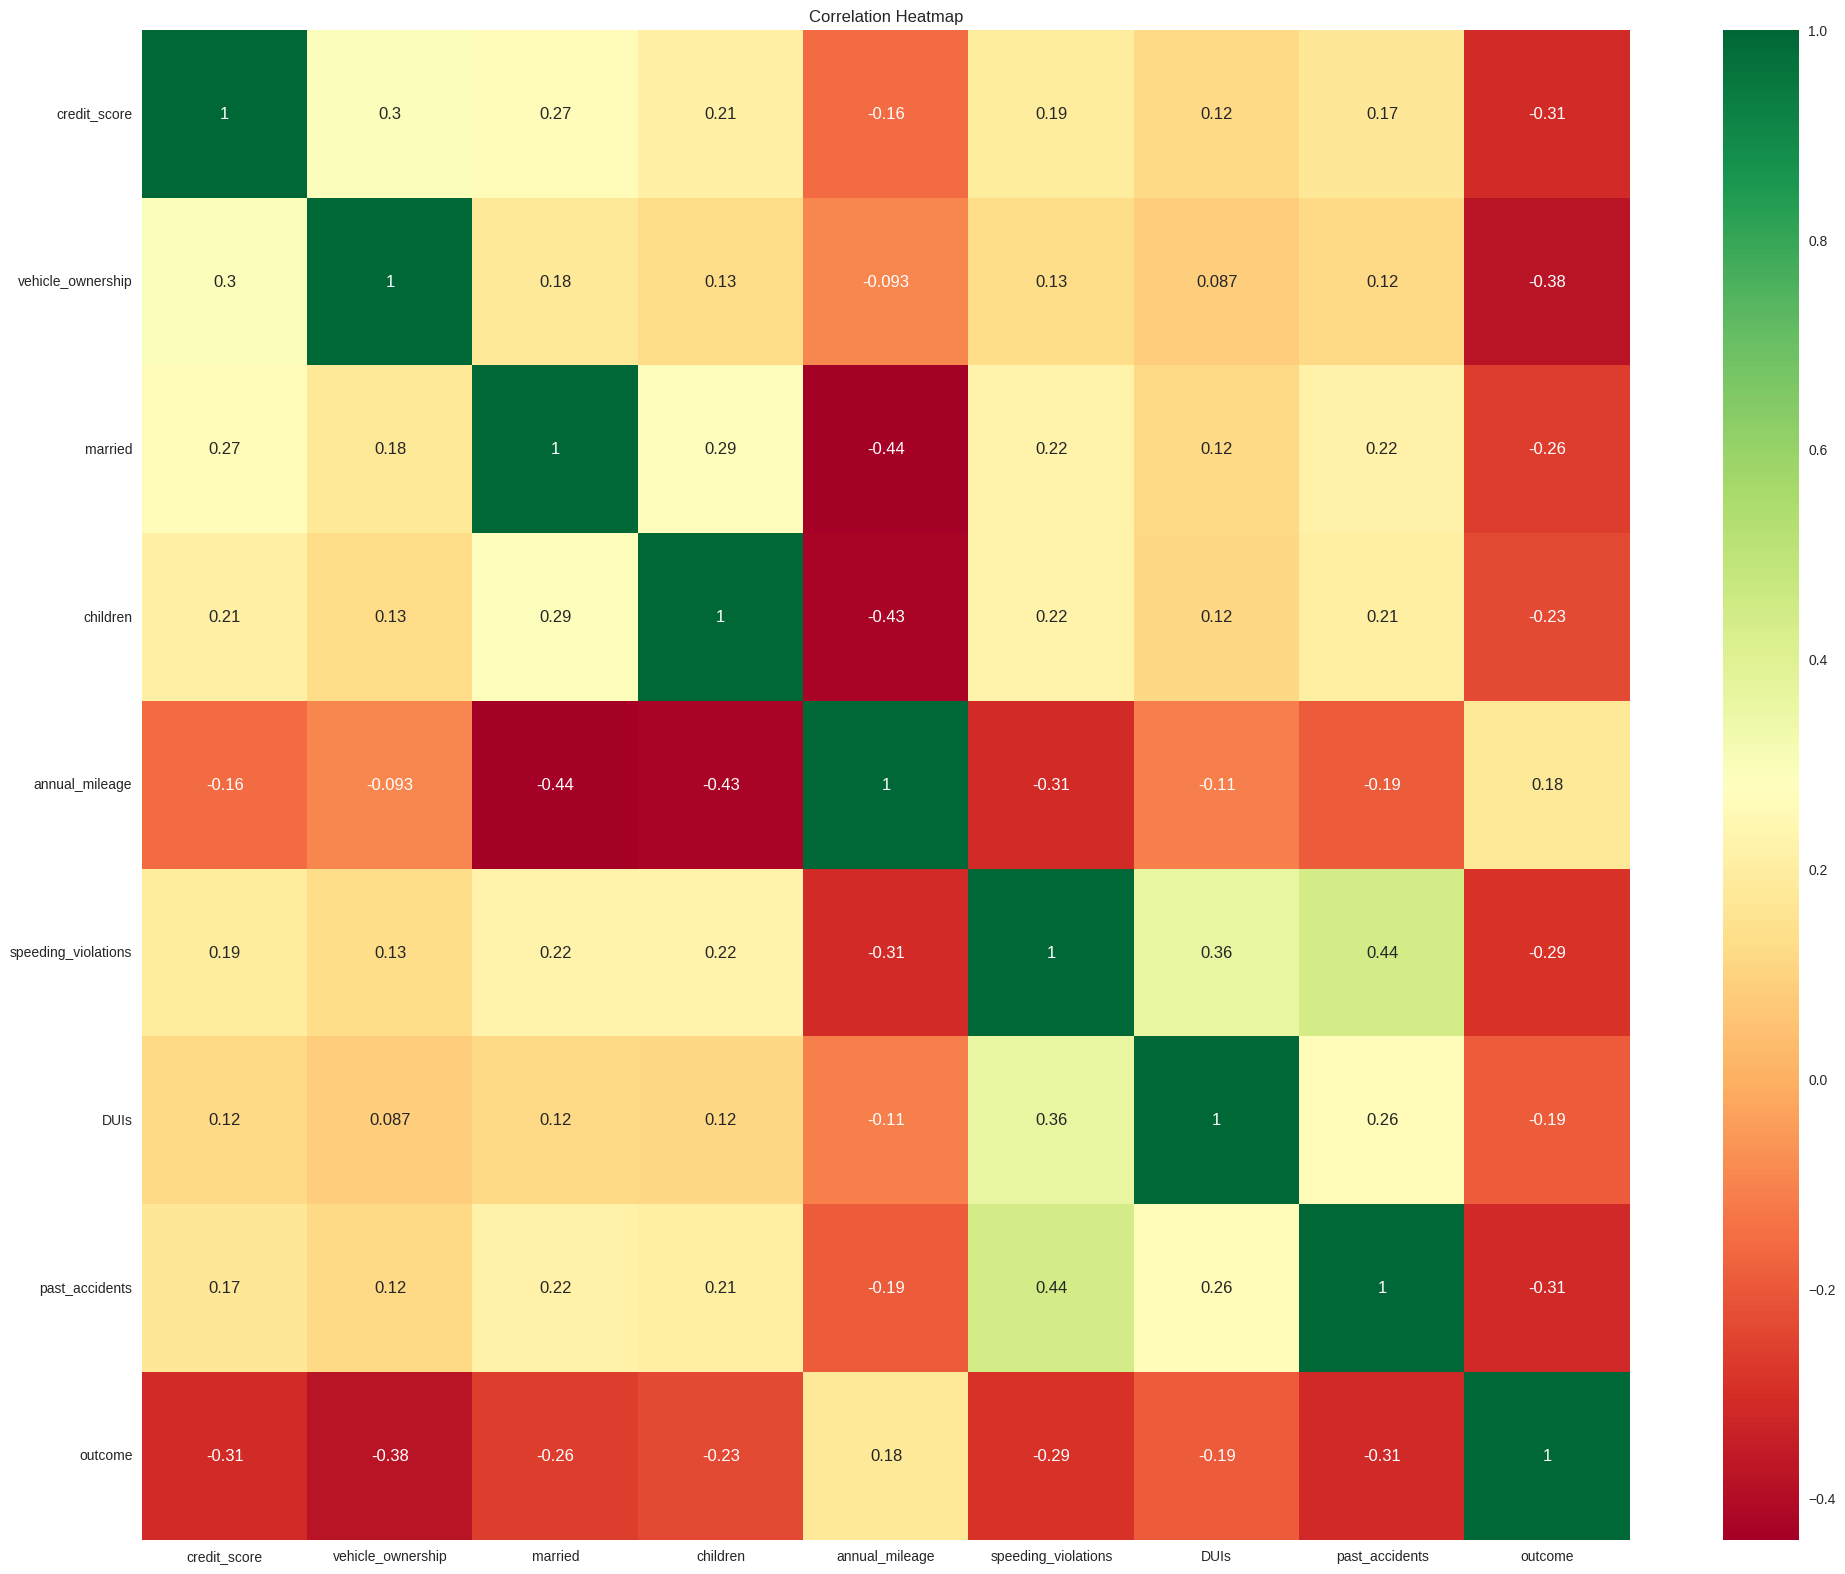

In [155]:
plt.figure(figsize=(24,20))
sns.heatmap(AutoCustomer_df.corr(),annot=True,cmap='RdYlGn')
plt.title('Correlation Heatmap',fontsize=12)
plt.yticks(rotation =0)
plt.show()

In [156]:
AutoCustomer_df.corr()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome
credit_score,1.000000,0.295689,0.267074,0.209515,-0.157641,0.194645,0.120953,0.172077,-0.309010
vehicle_ownership,0.295689,1.000000,0.175626,0.125990,-0.092701,0.133868,0.086567,0.119521,-0.378921
married,0.267074,0.175626,1.000000,0.287009,-0.439520,0.218855,0.120840,0.215269,-0.262104
children,0.209515,0.125990,0.287009,1.000000,-0.425813,0.220415,0.115354,0.206295,-0.232835
annual_mileage,-0.157641,-0.092701,-0.439520,-0.425813,1.000000,-0.308125,-0.111232,-0.187180,0.177575
speeding_violations,0.194645,0.133868,0.218855,0.220415,-0.308125,1.000000,0.359838,0.443074,-0.291862
DUIs,0.120953,0.086567,0.120840,0.115354,-0.111232,0.359838,1.000000,0.259359,-0.189352
past_accidents,0.172077,0.119521,0.215269,0.206295,-0.187180,0.443074,0.259359,1.000000,-0.311495
outcome,-0.309010,-0.378921,-0.262104,-0.232835,0.177575,-0.291862,-0.189352,-0.311495,1.000000


### The correlation map above shows the correlation coefficients for the variables in the dataset excluding categorical variables.

#### There is a significant positive correlation between these pairs :
- Speeding violations and past accidents.
- DUIs and speeding violations.
- Credit score and vehicle ownership.
- Married customers and credit score.
- Having children and credit score.
- Vehicle ownership and being married/ having children.
- Speeding violations and Customers with children.
The strongest positive correlation is between Speeding violations and past accidents(0.44).

### Outcome is negatively correlated with all variables except annual mileage.

### Annual mileage and Married customer are highly negatively correlated (-0.44)

Comparative plot of selected featues


<Figure size 800x550 with 0 Axes>

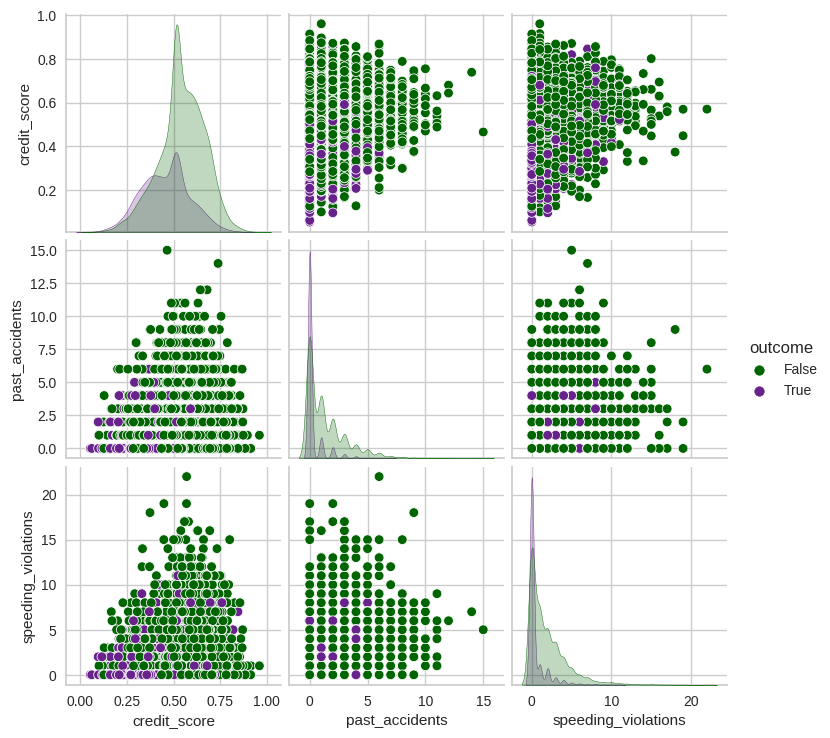

In [157]:
Plot_features = ['driving_experience','age','income','credit_score','outcome','past_accidents','speeding_violations']
print("Comparative plot of selected featues")
plt.figure()
sns.pairplot(AutoCustomer_df[Plot_features], hue= 'outcome',palette= (["#006400","#68228B"]))
plt.show()

Age Distribution 

Text(0.5, 0, 'Age range')

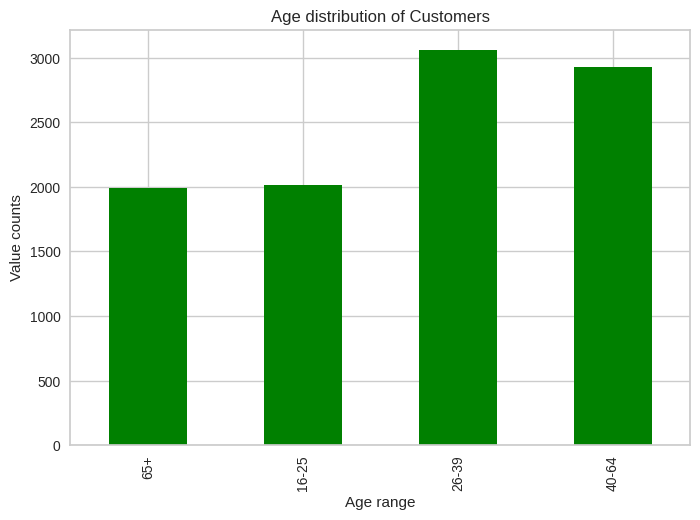

In [158]:
AutoCustomer_df['age'].value_counts(sort=False).plot(kind='bar', color="green")
plt.title("Age distribution of Customers")
plt.ylabel("Value counts")
plt.xlabel("Age range")

The chart shows the age distribution of the customers in the dataset. We have more customers within the age range 26-39 years.

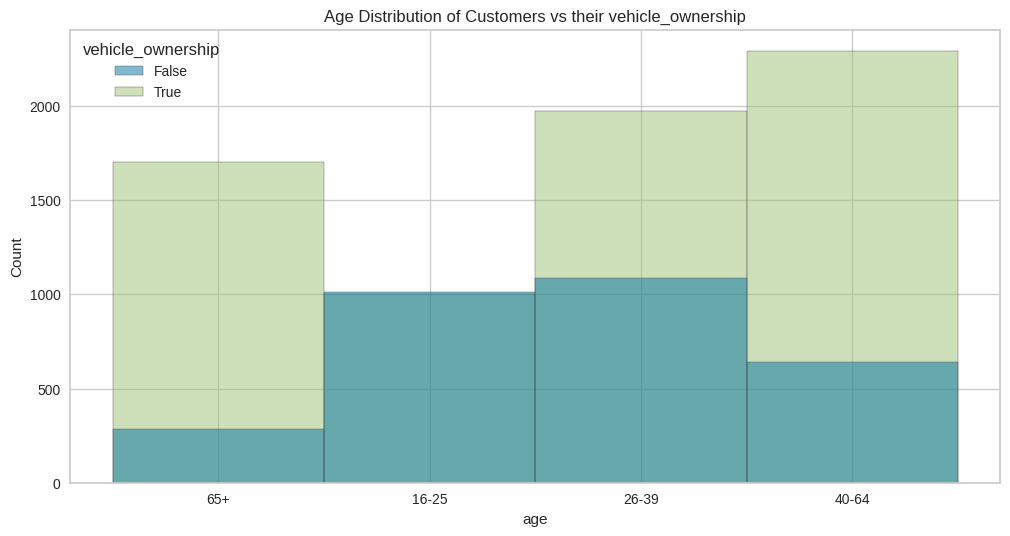

In [159]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=AutoCustomer_df,x="age",hue="vehicle_ownership",bins=30)
plt.title("Age Distribution of Customers vs their vehicle_ownership")
plt.show()

The age distribution vs vehicle ownership shows that Customers between age "40-64" own more vehicles than other age group.

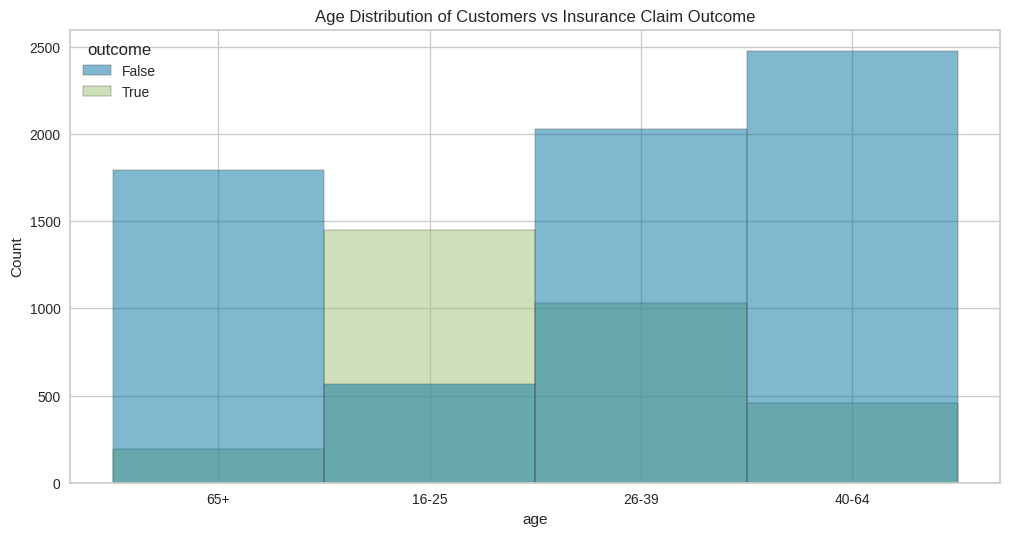

In [160]:
plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=AutoCustomer_df,x="age",hue="outcome",bins=30)
plt.title("Age Distribution of Customers vs Insurance Claim Outcome")
plt.show()

The outcome variable indicates 1 if a customer has filed insurance claim in the last year when they encounter an accident else 0.

The chart above shows that customers between age 16-25 have filed claims.

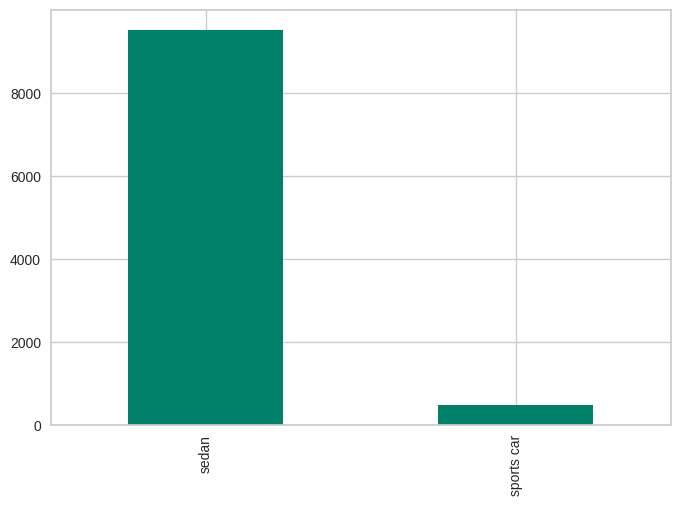

In [161]:
AutoCustomer_df['vehicle_type'].value_counts(sort=False).plot(kind='bar', cmap='summer')

The bar graph shows the distribution of vehicle type, we have more sedan car owners in the dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30c9429f90>,
      dtype=object)

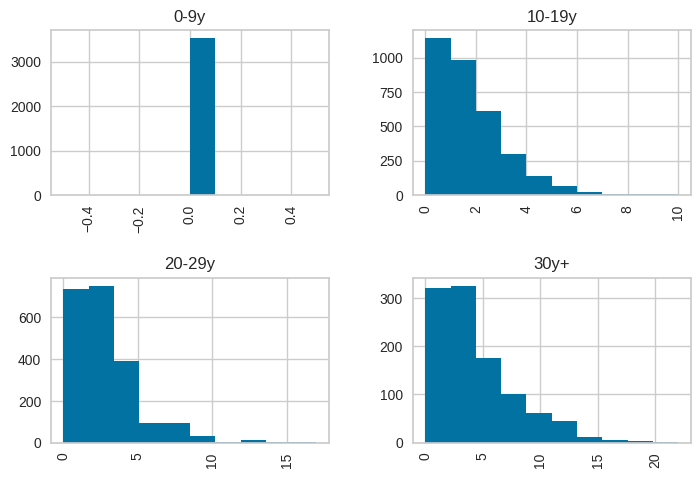

In [162]:
AutoCustomer_df.hist(by='driving_experience',
       column='speeding_violations')

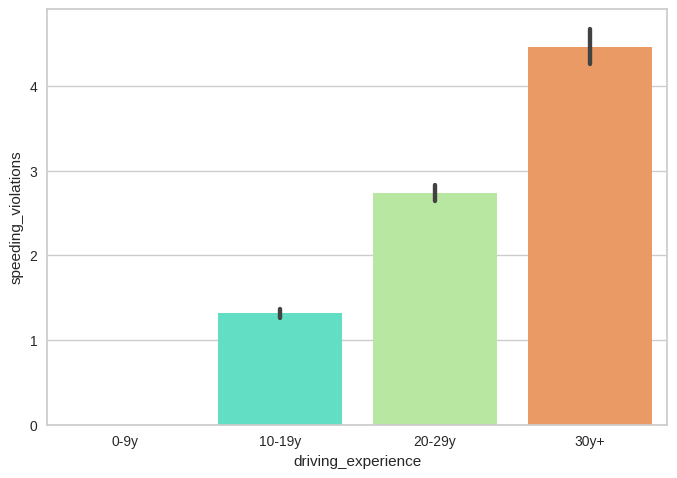

In [163]:
ax = sns.barplot(data = AutoCustomer_df,
                 x ='driving_experience',
                 y = 'speeding_violations',
                 palette = 'rainbow')

From the chart- the more customers drive over the years, the more likelihood for them to get speeding violations. We can see in the figure above that 30y+ driving experience has the highest bar in the chart.

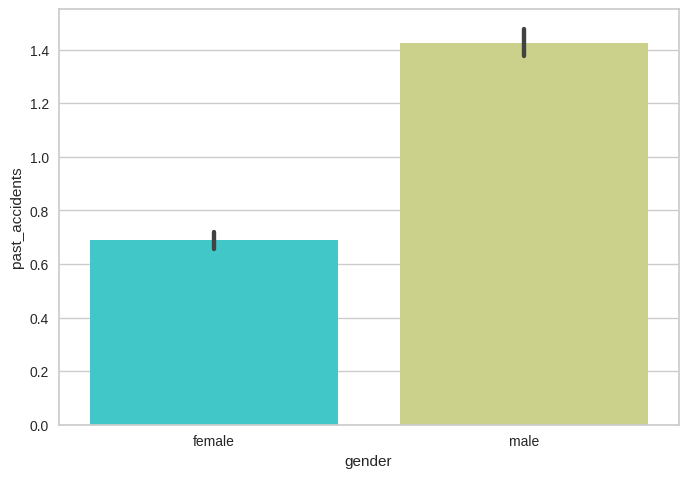

In [164]:
bx = sns.barplot(data = AutoCustomer_df,
                 x ='gender',
                 y = 'past_accidents',
                 palette = 'rainbow')

From the figure, 'Male' gender has higher number of past accidents reported based on our customer dataset.

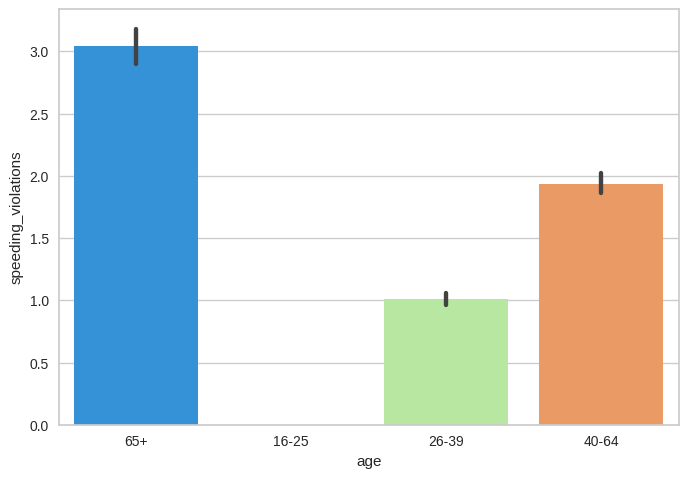

In [165]:
cx = sns.barplot(data = AutoCustomer_df,
                 x ='age',
                 y = 'speeding_violations',
                 palette = 'rainbow')

Customers aged 65+ recorded higher speeding violations than other age groups. Customers between 16-25 years have no speeding violations based on this dataset.

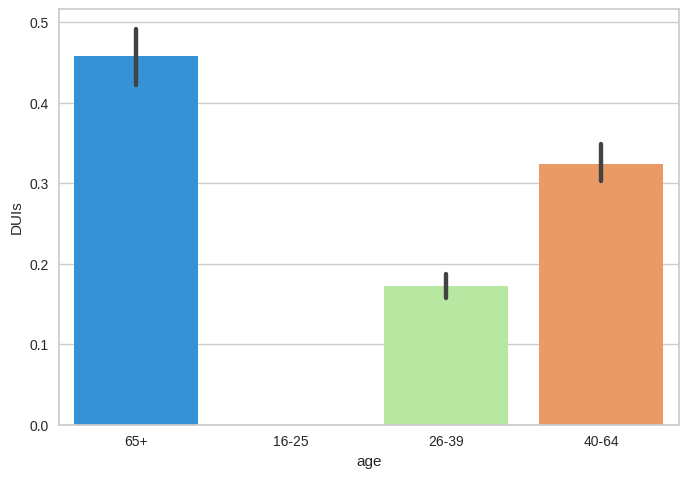

In [166]:
dx = sns.barplot(data = AutoCustomer_df,
                 x ='age',
                 y = 'DUIs',
                 palette = 'rainbow')

Customers between age 40-64 recorded higher DUIs than other age groups. Customers between 16-25 years have no DUI's based on this dataset.

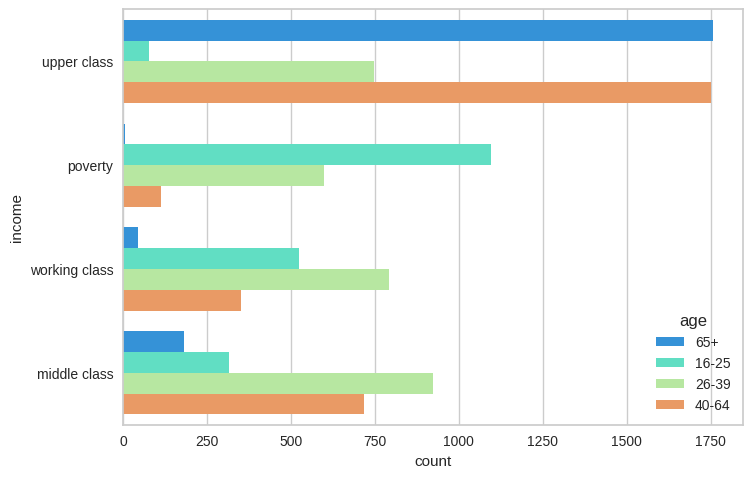

In [167]:
sns.countplot(y='income', hue='age', data= AutoCustomer_df, palette="rainbow")

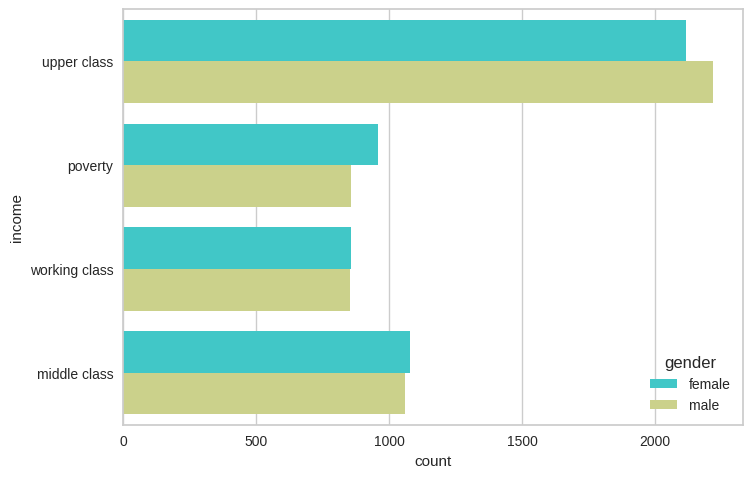

In [168]:
sns.countplot(y='income', hue='gender', data= AutoCustomer_df, palette="rainbow")

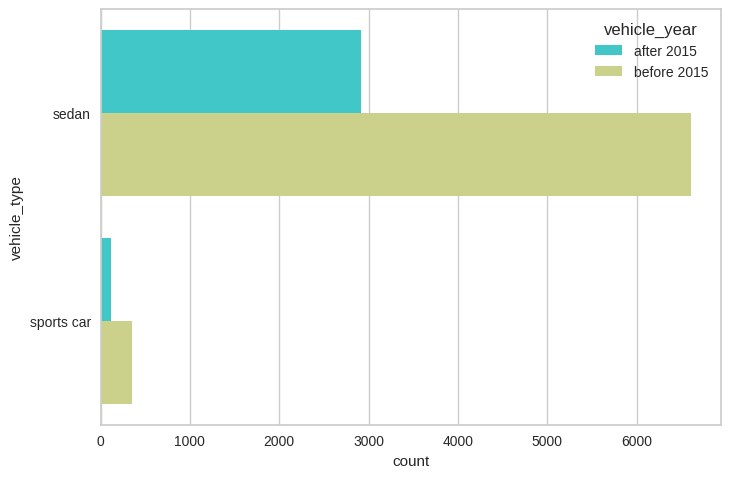

In [169]:
sns.countplot(y='vehicle_type', hue='vehicle_year', data= AutoCustomer_df, palette="rainbow")

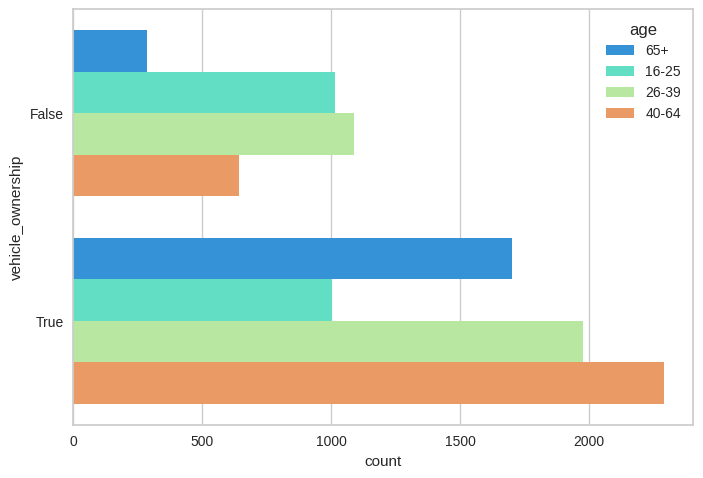

In [170]:
sns.countplot(y='vehicle_ownership', hue='age', data= AutoCustomer_df, palette="rainbow")

The above charts shows the count of variables in the dataset. 

There are more customers within the age 40-64 with vehicle ownership. 

For both sedan and sports car, the number of vehicles both before 2015 are higher, both male and female gender have more counts in upper class and the same percentage in working class. 

People in age 16-25 have higher counts in poverty income class.

# Credit score distribution

In [171]:
percent_credit_score = (AutoCustomer_df ['credit_score'] *100).round(2)
percent_credit_score

0       62.90
1       35.78
2       49.31
3       20.60
4       38.84
        ...  
9995    58.28
9996    52.22
9997    47.09
9998    36.42
9999    43.52
Name: credit_score, Length: 10000, dtype: float64

Text(0.5, 1.0, 'Credit Score Distribution')

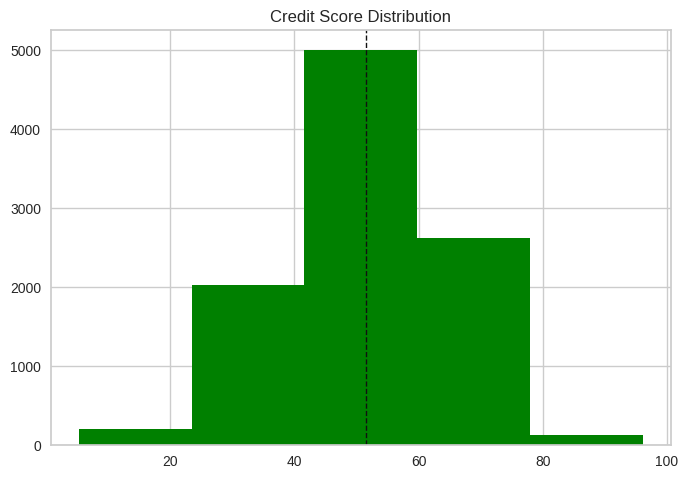

In [172]:
plt.hist(percent_credit_score, bins = 5, color= 'green')
plt.axvline(percent_credit_score.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Credit Score Distribution')

The Credit score distribution shows that most of the customers have atleast a credit score of 50%.

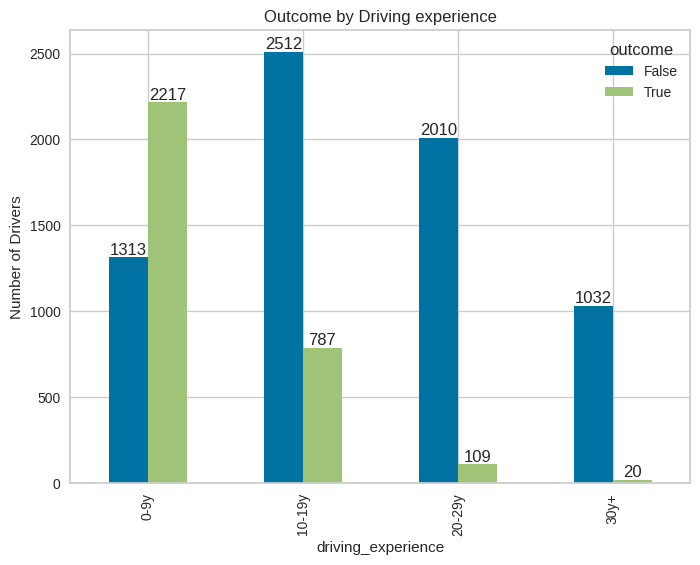

In [173]:
fx = AutoCustomer_df.groupby(['driving_experience','outcome']).size().unstack().plot(kind='bar',figsize=(8,6),ylabel='Number of Drivers',title="Outcome by Driving experience")
for p in fx.patches:
    fx.annotate(f'{p.get_height()}',(p.get_x()+p.get_width()/2, p.get_height()),ha='center',va='bottom')

Customers with driving experience filed more claims than other age groups.

# Auto Customer Profiling report

In [174]:
pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [175]:
import pandas_profiling as pp
from pandas_profiling import ProfileReport

In [176]:
profile = ProfileReport(AutoCustomer_df, title='Customer_Data Profiling Report')

In [177]:
pip install sweetviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [178]:
import sweetviz as sv
Customer_Data_report = sv.analyze(AutoCustomer_df)
Customer_Data_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Modelling

To apply K means clustering, all features must be numeric. Some of the data are not in numeric format, we solve this by applying dummy method.

In [179]:
AutoCustomer_dummies = pd.get_dummies(AutoCustomer_df)

In [180]:
AutoCustomer_dummies.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_16-25,...,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,vehicle_type_sedan,vehicle_type_sports car
0,0.629027,True,False,True,12000.0,0,0,0,False,0,...,0,0,0,0,1,0,1,0,1,0
1,0.357757,False,False,False,16000.0,0,0,0,True,1,...,1,0,0,1,0,0,0,1,1,0
2,0.493146,True,False,False,11000.0,0,0,0,False,1,...,0,0,0,0,0,1,0,1,1,0
3,0.206013,True,False,True,11000.0,0,0,0,False,1,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,True,False,False,12000.0,2,0,1,True,0,...,1,0,0,0,0,1,0,1,1,0


Scaling the dataset to make the data generalized for better analysis.

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [182]:
ScaledAutoCustomer_dummies = scaler.fit_transform(AutoCustomer_dummies)

In [183]:
ScaledAutoCustomer_dummies[0]

array([ 0.8659138 ,  0.65933317, -0.99640646,  0.67216087,  0.1130571 ,
       -0.66146157, -0.43102013, -0.63926317, -0.67545539, -0.50249877,
       -0.66448878, -0.64391556,  2.00627157,  0.998002  , -0.998002  ,
        1.35383204, -0.70165132, -0.51853111, -0.34288215,  1.18557199,
       -0.48668098, -0.80430331, -0.52147961, -0.47074181,  1.14292303,
       -0.4544928 ,  1.51560734, -1.51560734,  0.22380629, -0.22380629])

In [184]:
ScaledAutoCustomer_dummies.shape

(10000, 30)

#K means Using N Cluster  = 2

In [185]:
k_means_model = KMeans(n_clusters=2)

In [186]:
k_means_model.fit(ScaledAutoCustomer_dummies)

KMeans(n_clusters=2)

In [187]:
cluster_labels = k_means_model.predict(ScaledAutoCustomer_dummies)

In [188]:
cluster_labels

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

#Merging cluster with dummy dataset

In [189]:
AutoCustomer_dummies2 = AutoCustomer_dummies.copy()

In [190]:
AutoCustomer_dummies2.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_16-25,...,education_none,education_university,income_middle class,income_poverty,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,vehicle_type_sedan,vehicle_type_sports car
0,0.629027,True,False,True,12000.0,0,0,0,False,0,...,0,0,0,0,1,0,1,0,1,0
1,0.357757,False,False,False,16000.0,0,0,0,True,1,...,1,0,0,1,0,0,0,1,1,0
2,0.493146,True,False,False,11000.0,0,0,0,False,1,...,0,0,0,0,0,1,0,1,1,0
3,0.206013,True,False,True,11000.0,0,0,0,False,1,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,True,False,False,12000.0,2,0,1,True,0,...,1,0,0,0,0,1,0,1,1,0


In [191]:
AutoCustomer_dummies2["Cluster"] = cluster_labels

In [192]:
AutoCustomer_dummies2.head()

,credit_score,vehicle_ownership,married,children,annual_mileage,speeding_violations,DUIs,past_accidents,outcome,age_16-25,...,education_university,income_middle class,income_poverty,income_upper class,income_working class,vehicle_year_after 2015,vehicle_year_before 2015,vehicle_type_sedan,vehicle_type_sports car,Cluster
0,0.629027,True,False,True,12000.0,0,0,0,False,0,...,0,0,0,1,0,1,0,1,0,0
1,0.357757,False,False,False,16000.0,0,0,0,True,1,...,0,0,1,0,0,0,1,1,0,1
2,0.493146,True,False,False,11000.0,0,0,0,False,1,...,0,0,0,0,1,0,1,1,0,1
3,0.206013,True,False,True,11000.0,0,0,0,False,1,...,1,0,0,0,1,0,1,1,0,1
4,0.388366,True,False,False,12000.0,2,0,1,True,0,...,0,0,0,0,1,0,1,1,0,1


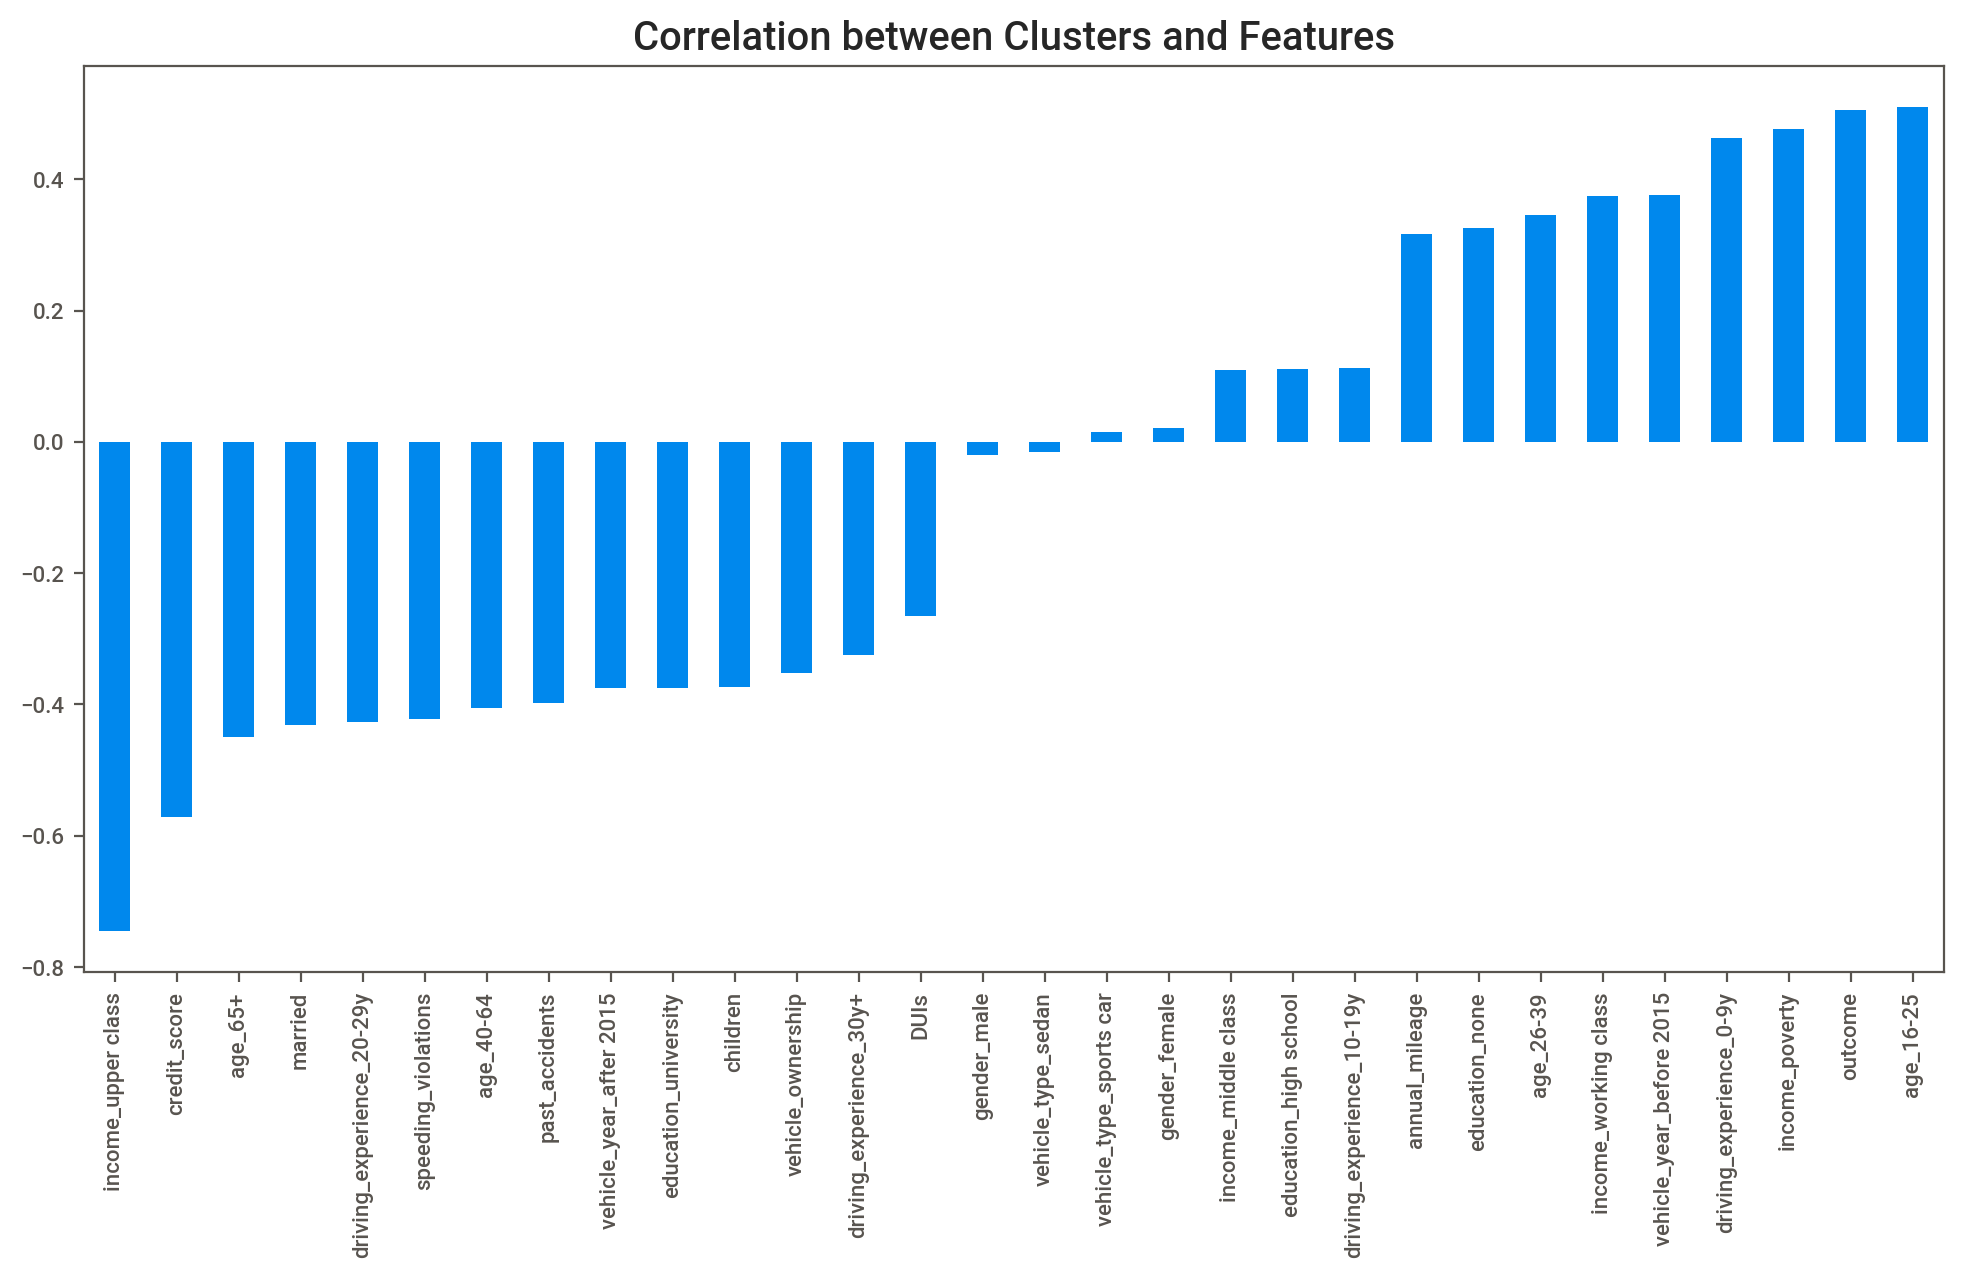

In [193]:
plt.figure(figsize=(12,6),dpi=200)
AutoCustomer_dummies2.corr()["Cluster"].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Correlation between Clusters and Features")
plt.show()

# Applying Elbow  curve method to find optimal K means.

In [194]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [195]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(AutoCustomer_dummies)
    
    ssd.append(model.inertia_)

In [196]:
ssd

[28800808047.929256,
 12989398236.619305,
 8347042425.880407,
 5114204285.599949,
 3763099055.938809,
 2629190913.6155205,
 2032033930.31244,
 1556754572.6217518]

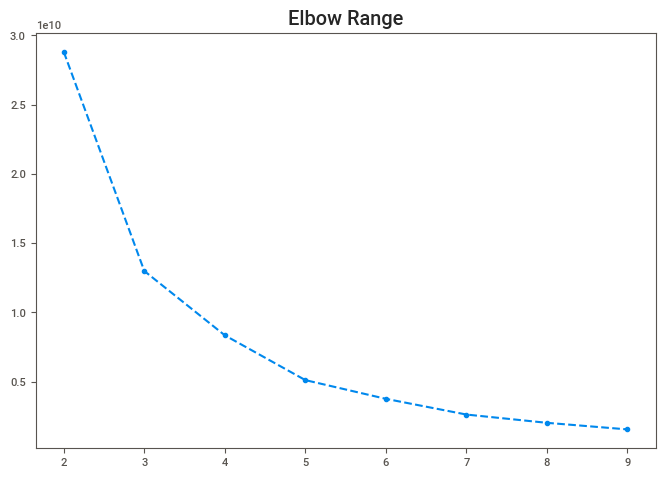

In [197]:
plt.plot(range(2,10),ssd,"o--")
plt.title("Elbow Range")
plt.show()

There is an elbow at 5. K value/ optimal value of clusters is 5.

Applying Kmeans to the dataset

In [198]:
kmeans = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [199]:
y_kmeans = kmeans.fit_predict(AutoCustomer_dummies)

In [200]:
y_kmeans

array([2, 4, 2, ..., 1, 1, 1], dtype=int32)

In [201]:
X = np.array(AutoCustomer_dummies)

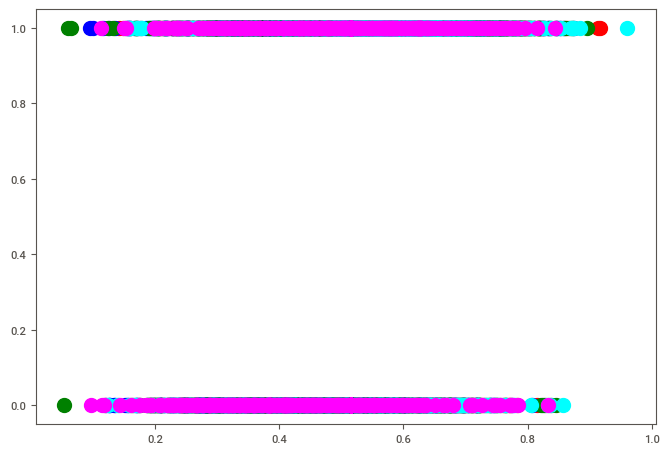

In [202]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

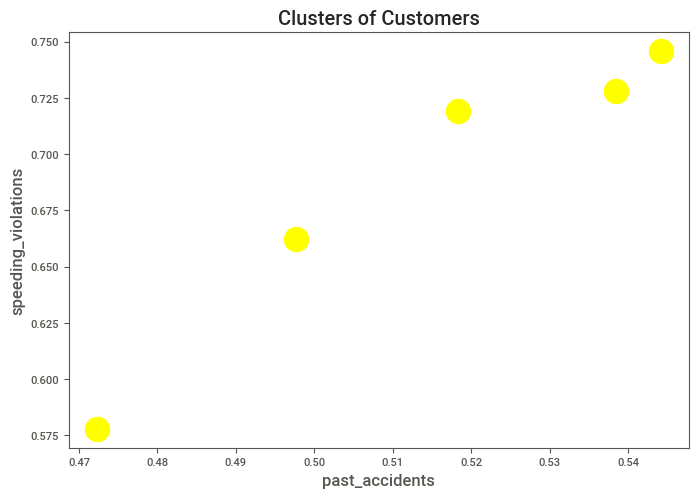

In [203]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('past_accidents')
plt.ylabel('speeding_violations')
plt.show()

The chat above does not present our clusters. Let's plot on the scaled data to see if it returns a better chart.

In [204]:
y_kmeans1 = kmeans.fit_predict(ScaledAutoCustomer_dummies)

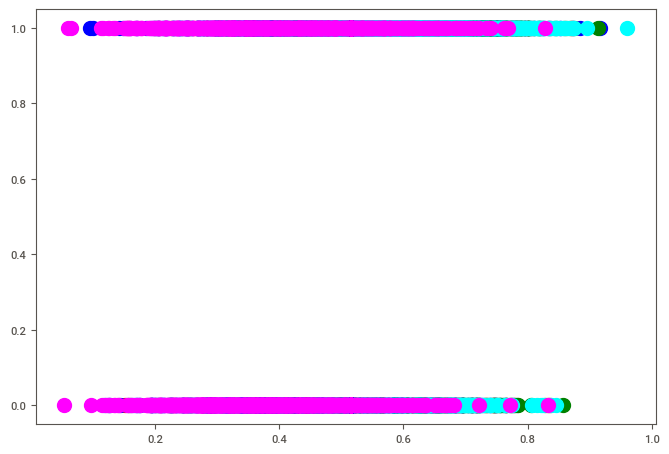

In [205]:
plt.scatter(X[y_kmeans1==0, 0], X[y_kmeans1==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans1==1, 0], X[y_kmeans1==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans1==2, 0], X[y_kmeans1==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans1==3, 0], X[y_kmeans1==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans1==4, 0], X[y_kmeans1==4, 1], s=100, c='magenta', label ='Cluster 5')

In [206]:
X1 = np.array(ScaledAutoCustomer_dummies)

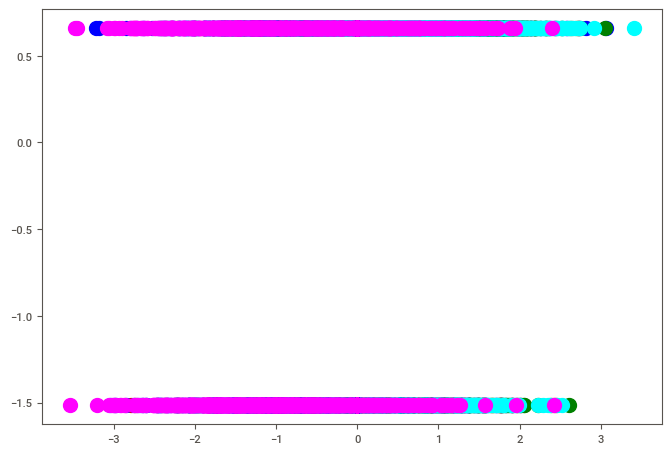

In [207]:
plt.scatter(X1[y_kmeans1==0, 0], X1[y_kmeans1==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X1[y_kmeans1==1, 0], X1[y_kmeans1==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X1[y_kmeans1==2, 0], X1[y_kmeans1==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X1[y_kmeans1==3, 0], X1[y_kmeans1==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X1[y_kmeans1==4, 0], X1[y_kmeans1==4, 1], s=100, c='magenta', label ='Cluster 5')

Running on the scaled data does not produce better result. To improve our visualization and clustering. We will apply PCA at the later part of the project.

#Feature Selection and Decision Tree

We would go ahead and let our dataset decide on the appropriate classification and the most important variables by using DecisionTree

In [208]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
!pip install dmba
from dmba import plotDecisionTree, classificationSummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We are making the assumption that the 'outcome' variable in our dataset which tells us whether a customer has filed a claim or not in the past year is a direct indicator of customers risk level. This is due to the fact that a customer who has filed a claim once is likely to file yet another claim.

In [209]:
x = AutoCustomer_dummies.drop(columns = ['outcome'])
y = AutoCustomer_dummies['outcome']

# Then we create a decisionTree with all our datasets(one node) and  set aside some of our data for validation of our model by using the train test split 

In [210]:
AutoCustomerTree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [211]:
train_x,valid_x,train_y,valid_y = train_test_split(x,y,test_size = 0.4,random_state = 1)

#Fitting the Decision Tree

In [212]:
AutoCustomerTree.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=5, random_state=1)

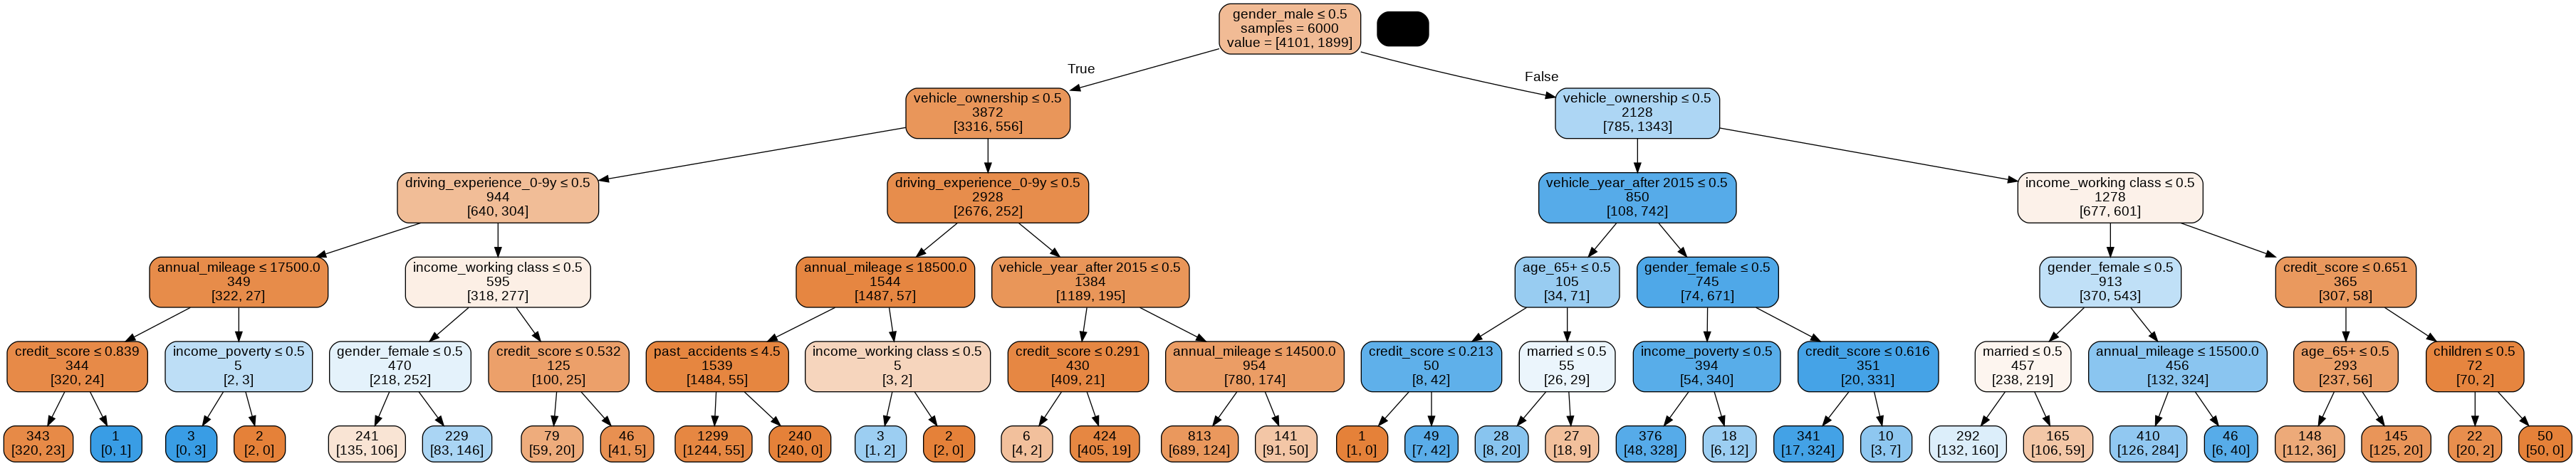

In [213]:
plotDecisionTree(AutoCustomerTree,feature_names=AutoCustomer_dummies.columns[:29])

In [214]:
classificationSummary(valid_y,AutoCustomerTree.predict(valid_x))

Confusion Matrix (Accuracy 0.8423)

       Prediction
Actual    0    1
     0 2465  301
     1  330  904


# With 84% accuracy, it is safe to classify these customers according to the risk levels mentioned above using the important variables produced by this model below

In [215]:
Var_Importance = AutoCustomerTree.feature_importances_
Var_Importance

array([8.01162659e-03, 2.02924602e-01, 9.63193849e-03, 2.09121966e-04,
       1.36610993e-02, 0.00000000e+00, 0.00000000e+00, 6.01469604e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.58766222e-03, 2.98017243e-02, 5.40573444e-01, 6.79678357e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.19099693e-03,
       0.00000000e+00, 1.01401519e-01, 1.64369592e-02, 0.00000000e+00,
       0.00000000e+00])

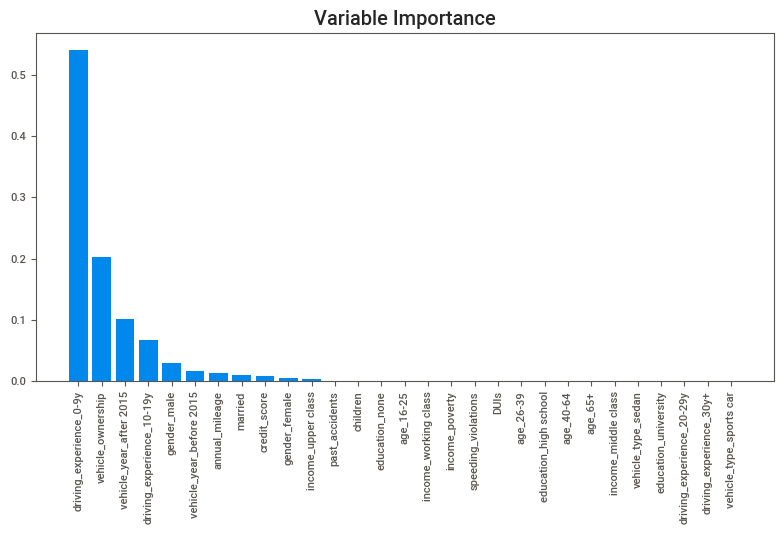

In [216]:
sorted_indices = np.argsort(Var_Importance)[::-1]
plt.title('Variable Importance')
plt.bar(range(train_x.shape[1]), Var_Importance[sorted_indices], align='center')
plt.xticks(range(train_x.shape[1]), train_x.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

The important variables are driving experience (0-9years), Vehicle ownership, Vehicle year (after 2015), driving experience(10-19years), gender(male), vehicle year(before 2015), annual mileage, married, credit score, gender(female) in descending order.

# Dimensionality Reduction

In [217]:
AutoCustomer_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score               10000 non-null  float64
 1   vehicle_ownership          10000 non-null  bool   
 2   married                    10000 non-null  bool   
 3   children                   10000 non-null  bool   
 4   annual_mileage             10000 non-null  float64
 5   speeding_violations        10000 non-null  int64  
 6   DUIs                       10000 non-null  int64  
 7   past_accidents             10000 non-null  int64  
 8   outcome                    10000 non-null  bool   
 9   age_16-25                  10000 non-null  uint8  
 10  age_26-39                  10000 non-null  uint8  
 11  age_40-64                  10000 non-null  uint8  
 12  age_65+                    10000 non-null  uint8  
 13  gender_female              10000 non-null  uint

## Selecting all important variable based on Variable Importance chart for dimensionality reduction

In [218]:
ImpAutoCustomer = AutoCustomer_dummies[['driving_experience_0-9y','vehicle_ownership','vehicle_year_after 2015', 'driving_experience_10-19y','gender_male', 'vehicle_year_before 2015', 
                                       'annual_mileage','married', 'credit_score','gender_female', 'gender_female']].copy()

In [219]:
ImpAutoCustomer 

,driving_experience_0-9y,vehicle_ownership,vehicle_year_after 2015,driving_experience_10-19y,gender_male,vehicle_year_before 2015,annual_mileage,married,credit_score,gender_female,gender_female
0,1,True,1,0,0,0,12000.000000,False,0.629027,1,1
1,1,False,0,0,1,1,16000.000000,False,0.357757,0,0
2,1,True,0,0,0,1,11000.000000,False,0.493146,1,1
3,1,True,0,0,1,1,11000.000000,False,0.206013,0,0
4,0,True,0,1,1,1,12000.000000,False,0.388366,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,True,0,1,0,1,16000.000000,False,0.582787,1,1
9996,0,True,1,1,0,0,11697.003207,False,0.522231,1,1
9997,1,True,0,0,1,1,14000.000000,False,0.470940,0,0
9998,0,False,0,1,0,1,13000.000000,False,0.364185,1,1


###Scaling Important Variables

In [220]:
scaler.fit(ImpAutoCustomer)
ImpAutoCustomer = scaler.fit_transform(ImpAutoCustomer)

In [221]:

from sklearn.decomposition import PCA

In [222]:
pca = PCA(n_components=3)
pca.fit(ImpAutoCustomer)
PCA_X = pd.DataFrame(pca.transform(ImpAutoCustomer), columns=['col1', 'col2', 'col3'])

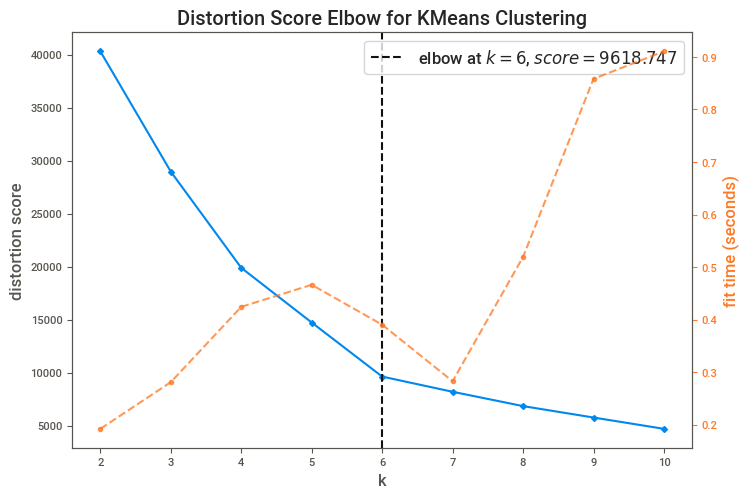

In [223]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(PCA_X)
elbow.show()

The elbow is at k = 6

# Auto Insurance Customer Analysis

In [224]:
kmeans = KMeans(n_clusters=6, random_state=42)
predict = kmeans.fit_predict(PCA_X)

AutoCustomer_df['Clusters'] = predict

In [225]:
AutoCustomer_df['Clusters']

0       1
1       0
2       5
3       0
4       3
       ..
9995    2
9996    1
9997    0
9998    2
9999    5
Name: Clusters, Length: 10000, dtype: int32

In [226]:
import plotly.graph_objects as go

In [227]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

cluster0_val = AutoCustomer_df[AutoCustomer_df["Clusters"]==0].shape[0]
cluster1_val = AutoCustomer_df[AutoCustomer_df["Clusters"]==1].shape[0]
cluster2_val = AutoCustomer_df[AutoCustomer_df["Clusters"]==2].shape[0]
cluster3_val = AutoCustomer_df[AutoCustomer_df["Clusters"]==3].shape[0]
cluster4_val = AutoCustomer_df[AutoCustomer_df["Clusters"]==4].shape[0]
cluster5_val = AutoCustomer_df[AutoCustomer_df["Clusters"]==5].shape[0]
values = [cluster0_val, cluster1_val, cluster2_val, cluster3_val, cluster4_val, cluster5_val ]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole = 0.5, title="Clusters")])
fig.show()

The above chart shows the percentage distribution of our clusters. There are 6 clusters using the Kmeans clustering after Dimension reduction.
Cluster 0 - 14%

Cluster 1 - 14.6%

Cluster 2 - 21.8%

Cluster 3 - 20.9%

Cluster 4 - 15%

Clusster 5 - 13.7%

#Visualizing all our KMeans Clusters. 

###Getting unique labels
###First we create an array of the clustered data using numpy

In [228]:
PCA_X_df_array = PCA_X.to_numpy()

In [229]:
Label = kmeans.fit_predict(PCA_X_df_array)

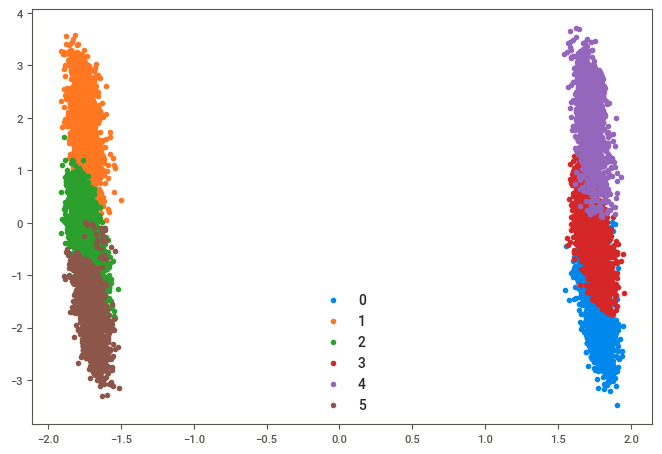

In [230]:
# Then, we get the unique labels to visulaize out clustered data
 
u_labels = np.unique(predict)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(PCA_X_df_array[Label == i , 0] , PCA_X_df_array[Label == i , 1] , Label = i)
plt.legend()
plt.show()

# Plotting Cluster Centriod to see how close the clusters are to the centriod

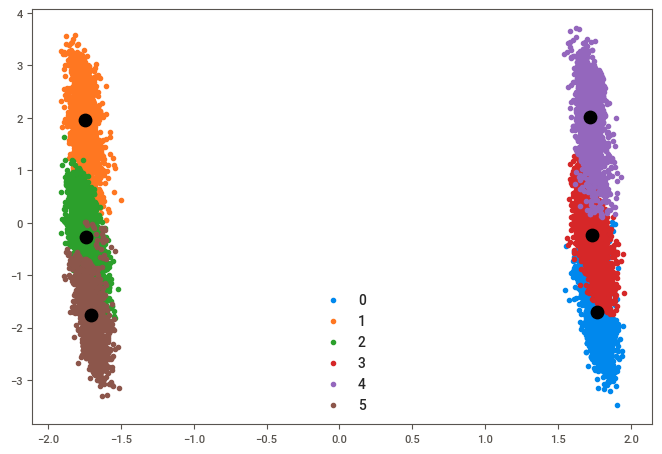

In [231]:
centers = kmeans.cluster_centers_
u_labels = np.unique(predict)

for i in u_labels:
    plt.scatter(PCA_X_df_array[Label == i , 0] , PCA_X_df_array[Label == i , 1] , Label = i)
plt.scatter(centers[:,0] , centers[:,1] , s = 80, c='black')
plt.legend()
plt.show()

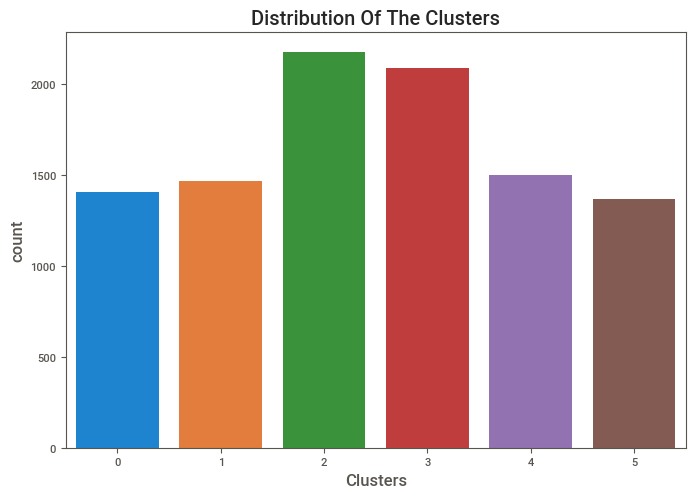

In [232]:
pl = sns.countplot(x= AutoCustomer_df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

More customers fall in Cluster 2 and 3. Cluster 0 has the least numbers of customers.

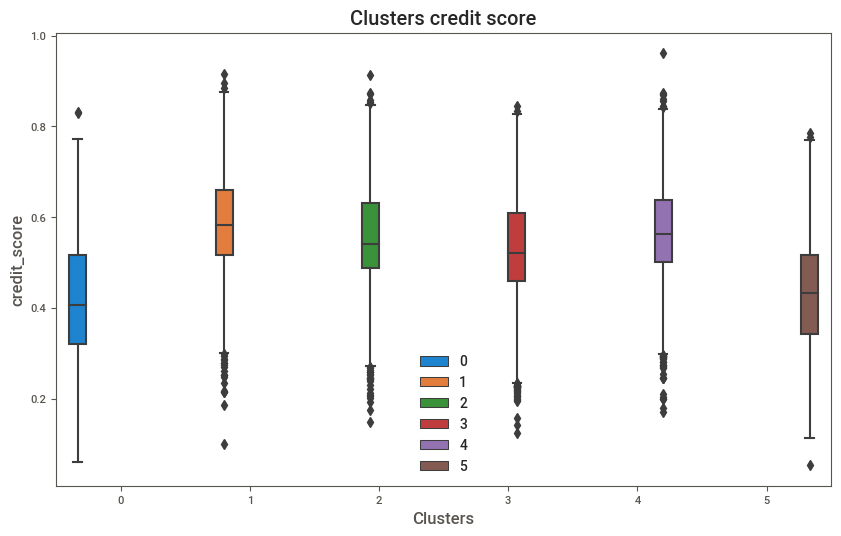

In [233]:
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x = AutoCustomer_df['Clusters'], y = AutoCustomer_df['credit_score'], hue = AutoCustomer_df['Clusters'])
plot.set_title('Clusters credit score')
plt.legend()
plt.show()

Cluster 0 - Customers with relatively high credit score

Cluster 1- Customers with high credit score

Cluster 2- Customers with high credit score

Cluster 3- Customers with relatively high credit score

Cluster 4- Customers with high credit score

Cluster 5- Customers with average credit score

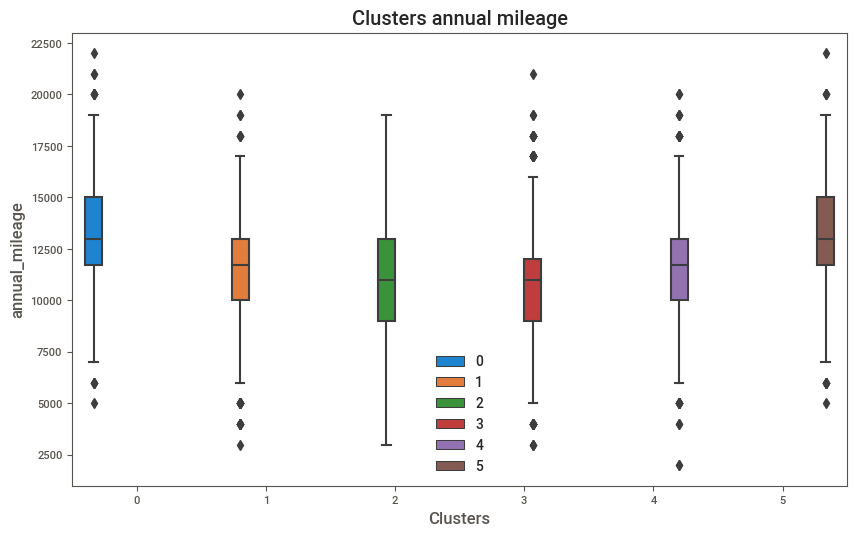

In [234]:
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x = AutoCustomer_df['Clusters'], y = AutoCustomer_df['annual_mileage'], hue = AutoCustomer_df['Clusters'])
plot.set_title('Clusters annual mileage')
plt.legend()
plt.show()

Cluster 0- Customers with higher vehicle annual mileage

Cluster 1- Customers with relatively high annual mileage

Cluster 2- Customers with relatively high annual mileage

Cluster 3- Customers with average annual mileage

Cluster 4- Customers with relatively high annual mileage

Cluster 5- Customers with higher vehicle annual mileage

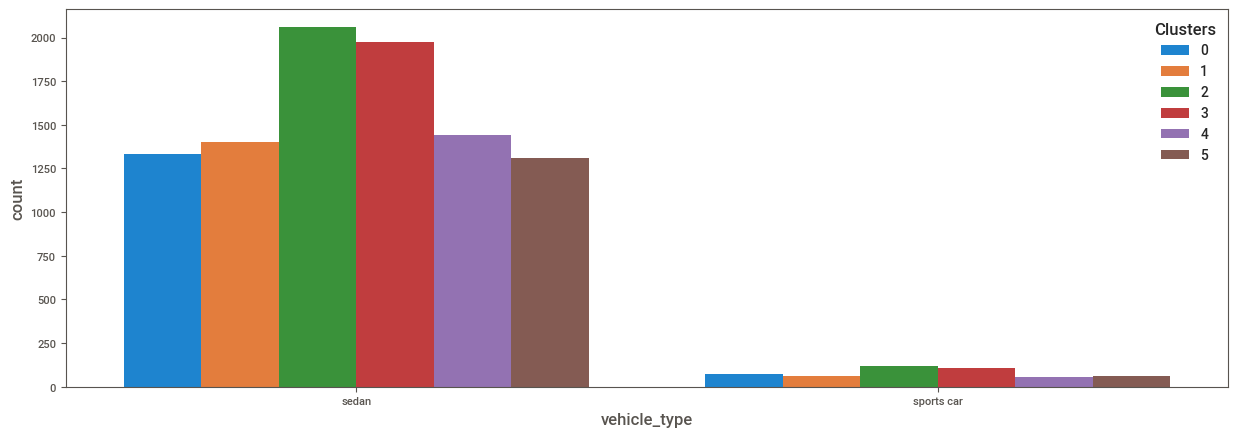

In [235]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['vehicle_type'],order=AutoCustomer_df['vehicle_type'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- More Sedan car owners than sports car.

Cluster 1- More Sedan car owners than sports car.

Cluster 2- More Sedan car owners than sports car. Has the highest number of sports car user.

Cluster 3- More Sedan car owners than sports car.

Cluster 4- More Sedan car owners than sports car.

Cluster 5- More Sedan car owners than sports car.

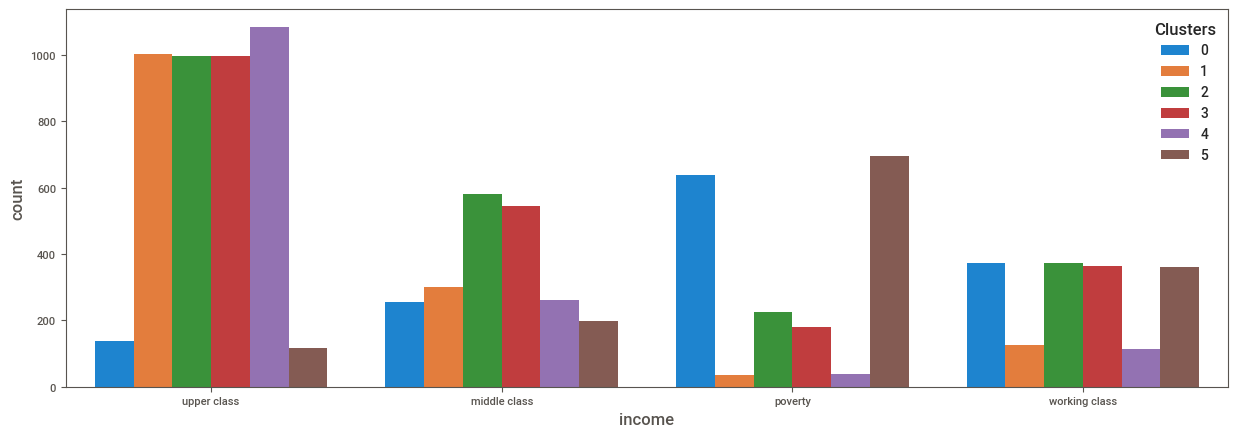

In [236]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['income'],order=AutoCustomer_df['income'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Low number of customers in upper class, relatively low number of customers in middle class, high number of customers in poverty class and working class.

Cluster 1- High number of customers in upper class, relatively high number of customers in middle class, very low number of customers in poverty class and low number of working class customers.

Cluster 2- High number of customers in upper class, high number of customers in middle class,relatively low number of customers in poverty class and average number of working class customers.

Cluster 3- High number of customers in upper class, high number of customers in middle class,relatively low number of customers in poverty class and average number of working class customers.

Cluster 4- Very high number of customers in upper class, low number of customers in middle class,very low number of customers in poverty class and low number of working class customers.

Cluster 5- Very low number of customers in upper class,low number of customers in middle class, very high number of customers in poverty class and hugh number of working class.

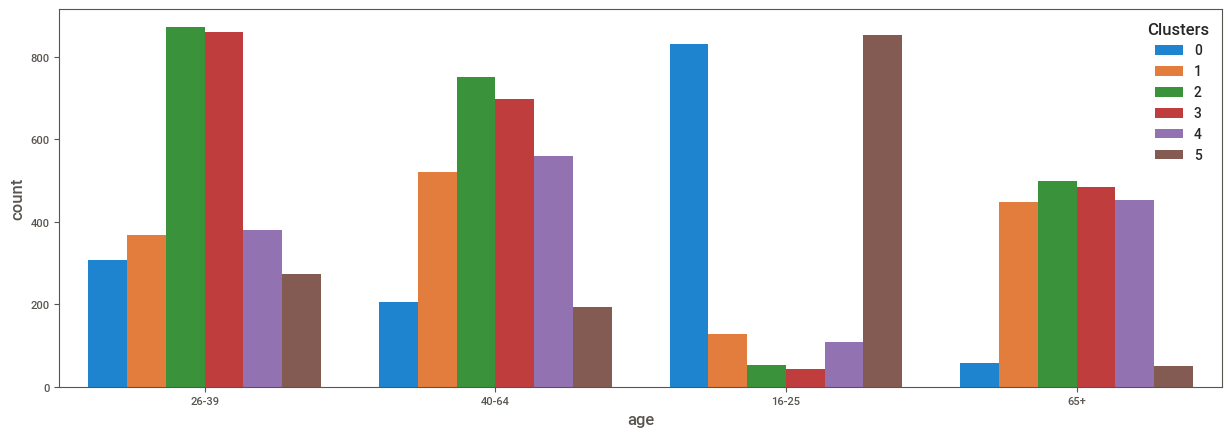

In [237]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['age'],order=AutoCustomer_df['age'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- More customers in age bracket 16-25, some customers in 26-39 and 40-64 age brackets, least customers in 65+

Cluster 1- More customers in age bracket 40-54, 65+ and relatively high numbers in 26-39 age bracket, least cusmers in 16-25.

Cluster 2- More customers in age bracket 26-39, 40-64 and relatively high numbers in 65+, least cusmers in 16-25.

Cluster 3- More customers in age bracket 26-39, 40-64 and relatively high numbers in 65+, least cusmers in 16-25.

Cluster 4- More customers in age bracket 40-64, 65+ and some customers in 26-39 age bracket, least customers in 65+

Cluster 5- More customers in age bracket 16-25, some customers in 26-39 and 40-64 age brackets, least customers in 65+

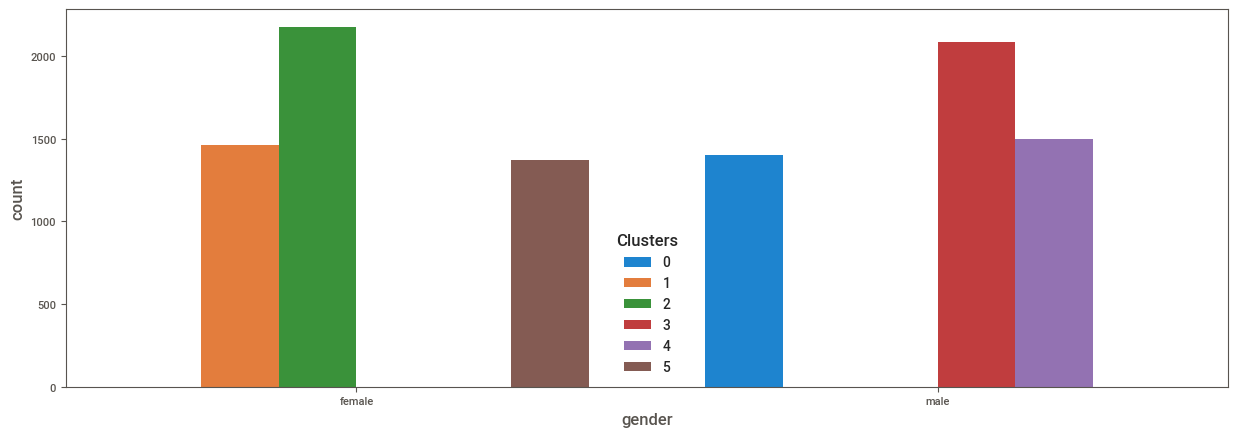

In [238]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['gender'],order=AutoCustomer_df['gender'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Male customers.

Cluster 1- Female customers.

Cluster 2- Female customers.

Cluster 3- Male customers.

Cluster 4- Male customers.

Cluster 5- Female customers.

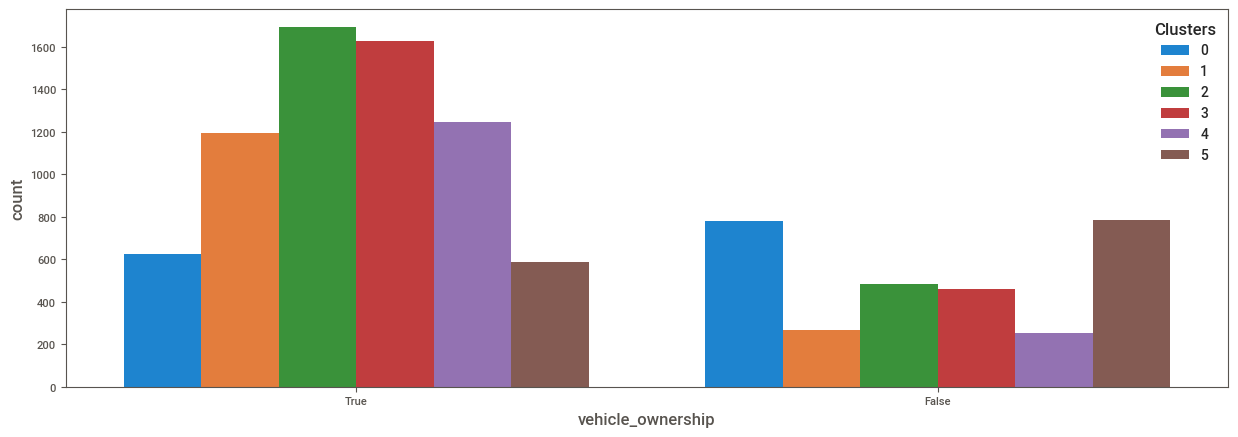

In [239]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['vehicle_ownership'],order=AutoCustomer_df['vehicle_ownership'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Most of the customers do not own cars. Some own cars

Cluster 1- More car owners than otherwise.

Cluster 2- More car owners than otherwise.

Cluster 3- More car owners than otherwise.

Cluster 4- More car owners than otherwise.

Cluster 5- Most of the customers do not own cars. Some own cars

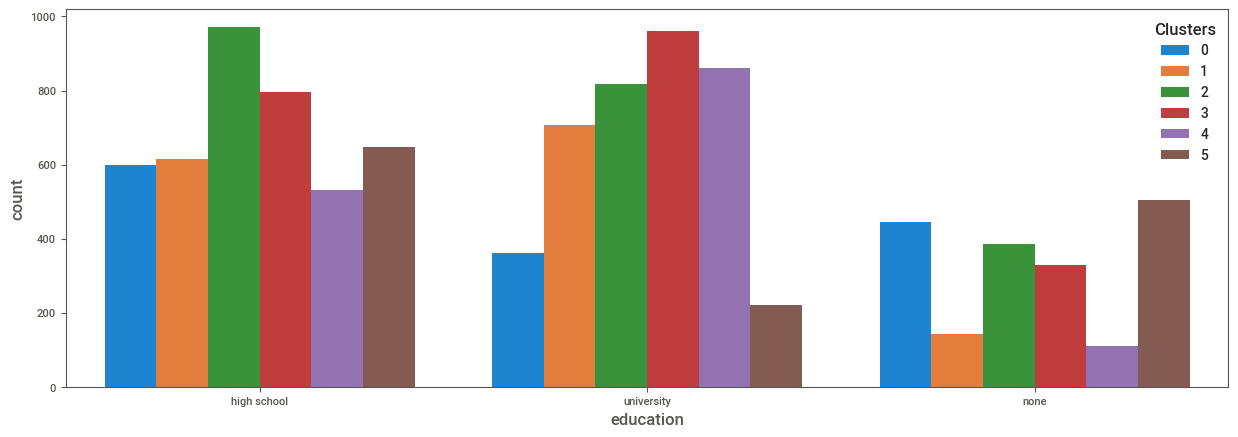

In [240]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['education'],order=AutoCustomer_df['education'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Most of the customers have high school education, relatively high number of people without education and some customers with university education.

Cluster 1- Most of the customers have university education, relatively high number of people with high school education and some customers with no education.

Cluster 2- Most of the customers have high school education, relatively high number of people with university education and some customers with no education.

Cluster 3- Most of the customers have university education, relatively high number of people with high school education and some customers with no education.

Cluster 4- Most of the customers have university education, relatively high number of people with high school education annd some customers with no education.

Cluster 5- Most of the customers have high school education, high number of people without education annd some customers with university education.

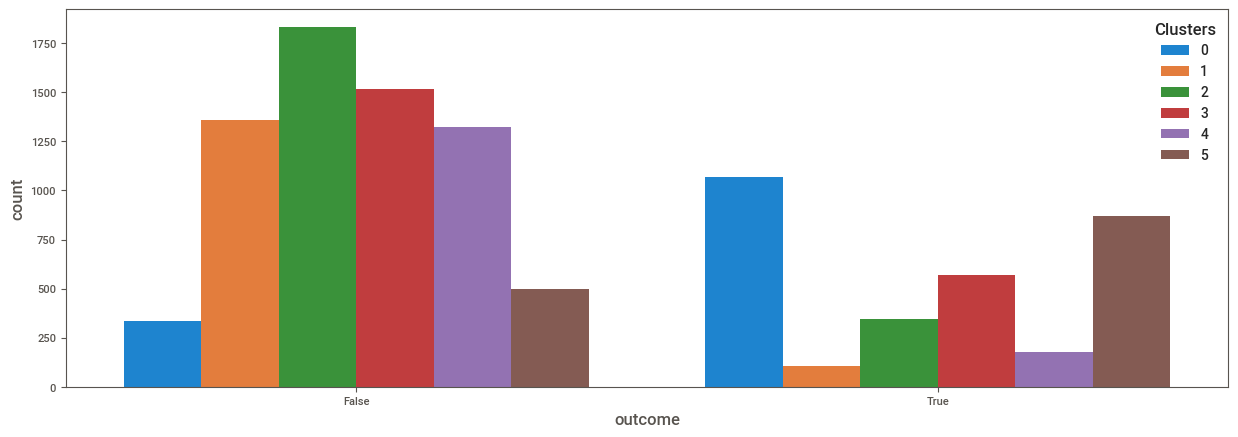

In [241]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['outcome'],order=AutoCustomer_df['outcome'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- More claims filed in the past year than not. Filed the most claims between the clusters.

Cluster 1- Less claims filed in the past year. Filed the least claims between the clusters.

Cluster 2- Less claims filed in the past year.

Cluster 3- Less claims filed in the past year.

Cluster 4- Relatively less claims filed in the past year.

Cluster 5- More claims filed in the past year than not.

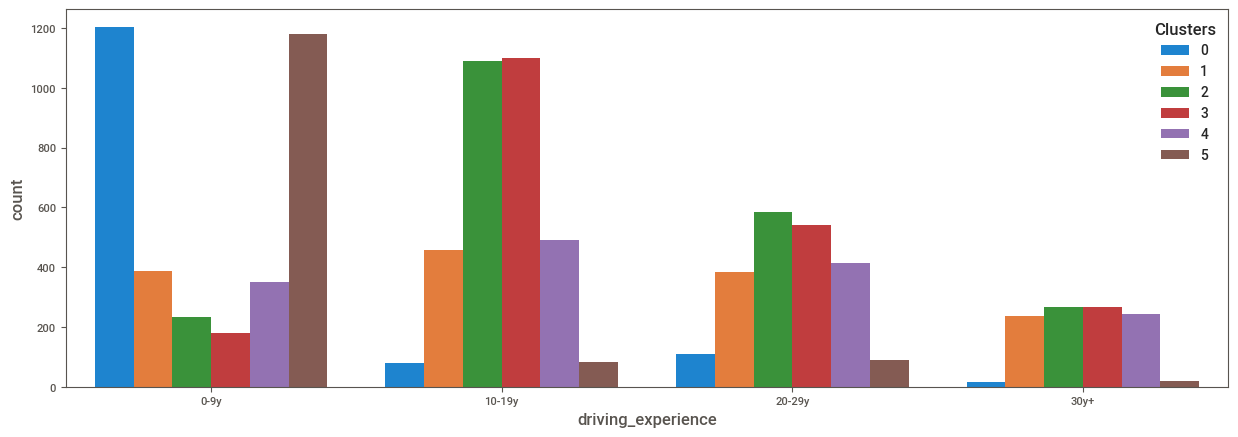

In [242]:
plt.subplots(figsize = (15,5))
sns.countplot(x=AutoCustomer_df['driving_experience'],order=AutoCustomer_df['driving_experience'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Most of the customers have driving experience between 0-9years. Cluster contains the least customers with driving experience of 30y+.

Cluster 1- Most of the customers have driving experience between 10-19years and some customers with 0-9 years, 20-29 years and 30y+ driving experience.

Cluster 2- Most of the customers have driving experience between 10-19years and some customers with 20-29 years driving experience. Relatively low count of customers with 0-9 years and 30y+ driving experience.

Cluster 3- Most of the customers have driving experience between 10-19years and some customers with 20-29 years driving experience. Relatively low count of customers with 0-9 years and 30y+ experience.

Cluster 4- Most of the customers have driving experience between 10-19years and some customers with 0-9 years, 20-29 years and 30y+ driving experience.

Cluster 5- Most of the customers have driving experience between 0-9years. Relatively low count of customers with 10-19 years, 20-29years and 30y+ driving experience.

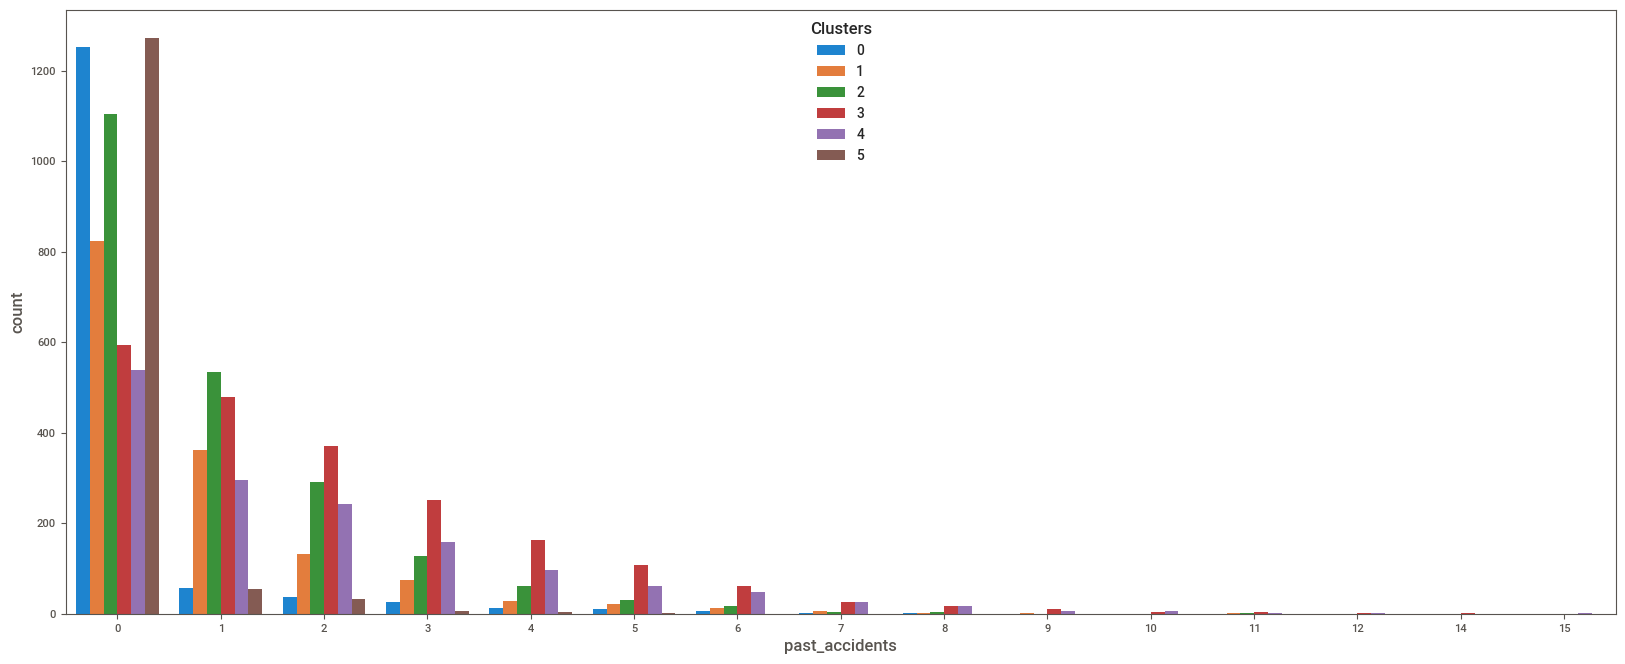

In [243]:
plt.subplots(figsize = (20,8))
sns.countplot(x=AutoCustomer_df['past_accidents'],order=AutoCustomer_df['past_accidents'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Customers with very low count of past accidents. Very few customers with at least 1 record of past accidents, no customer has more than 6 accidents.

Cluster 1- Customers with low count of past accidents. Some customers with at least 1 record of past accidents, no customer has more than 7 accidents.

Cluster 2- Customers with low count of past accidents. Some customers with at least 1 record of past accidents, no customer has more than 8 accidents.

Cluster 3- Customers with low count of past accidents. Some customers with at least 1 record of past accidents, no customer has more than 11 accidents.

Cluster 4-Customers with low count of past accidents. Some customers with at least 1 record of past accidents, no customer has more than 10 accidents.

Cluster 5- Customers with very low count of past accidents. Very few customers with at least 1 record of past accidents, no customer has more than 4 accidents.

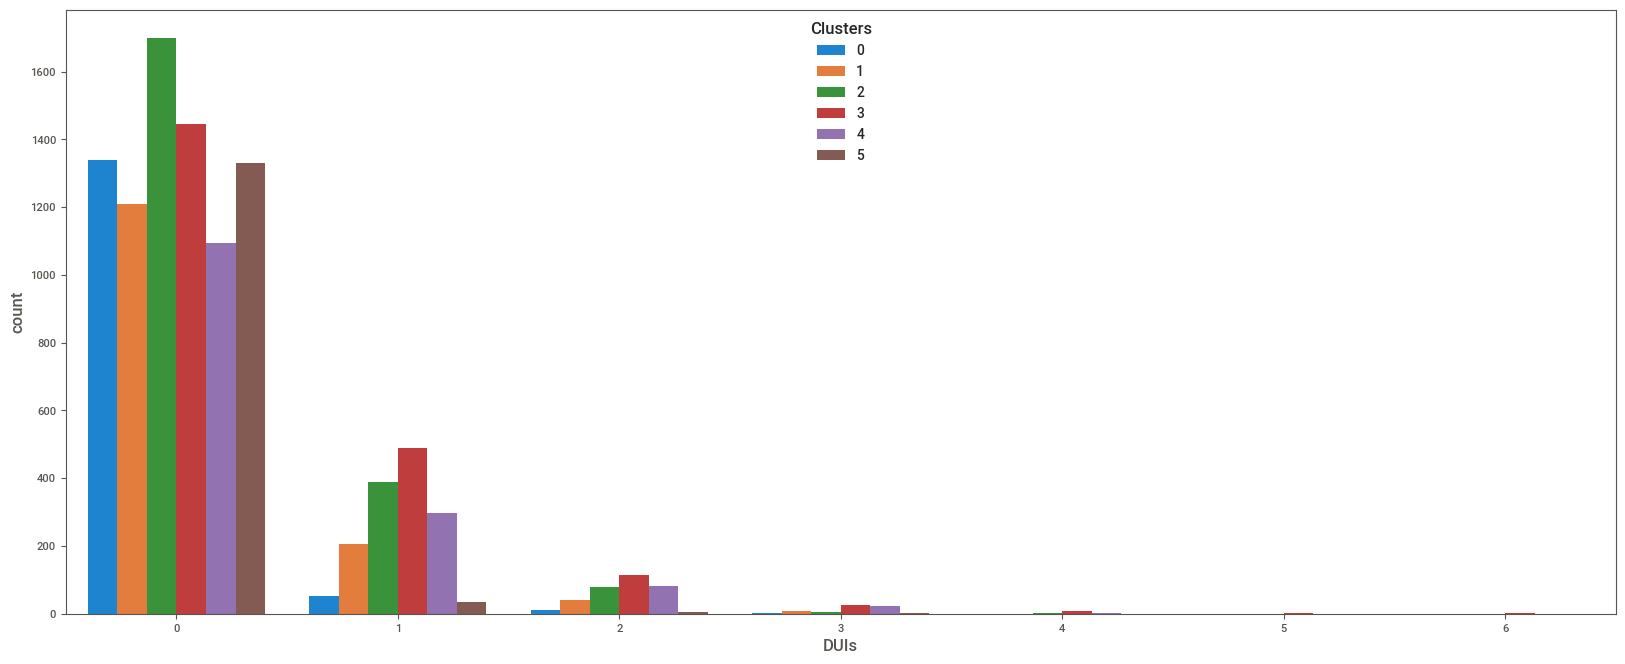

In [244]:
plt.subplots(figsize = (20,8))
sns.countplot(x=AutoCustomer_df['DUIs'],order=AutoCustomer_df['DUIs'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Customers with low count of DUIs. Some report of at least 1 DUI but not more than 2.

Cluster 1- Customers with low count of DUIs. Some report of at least 1 DUI but not more than 3.

Cluster 2- Customers with low count of DUIs. Some report of at least 1 DUI but not more than 3.

Cluster 3- Customers with low count of DUIs. Some report of at least 1 DUI but not more than 4. Cluster contains customers with the most DUI count.

Cluster 4- Customers with low count of DUIs. Some report of at least 1 DUI but not more than 3.

Cluster 5-  Customers with low count of DUIs. Some report of at least 1 DUI but not more than 2.

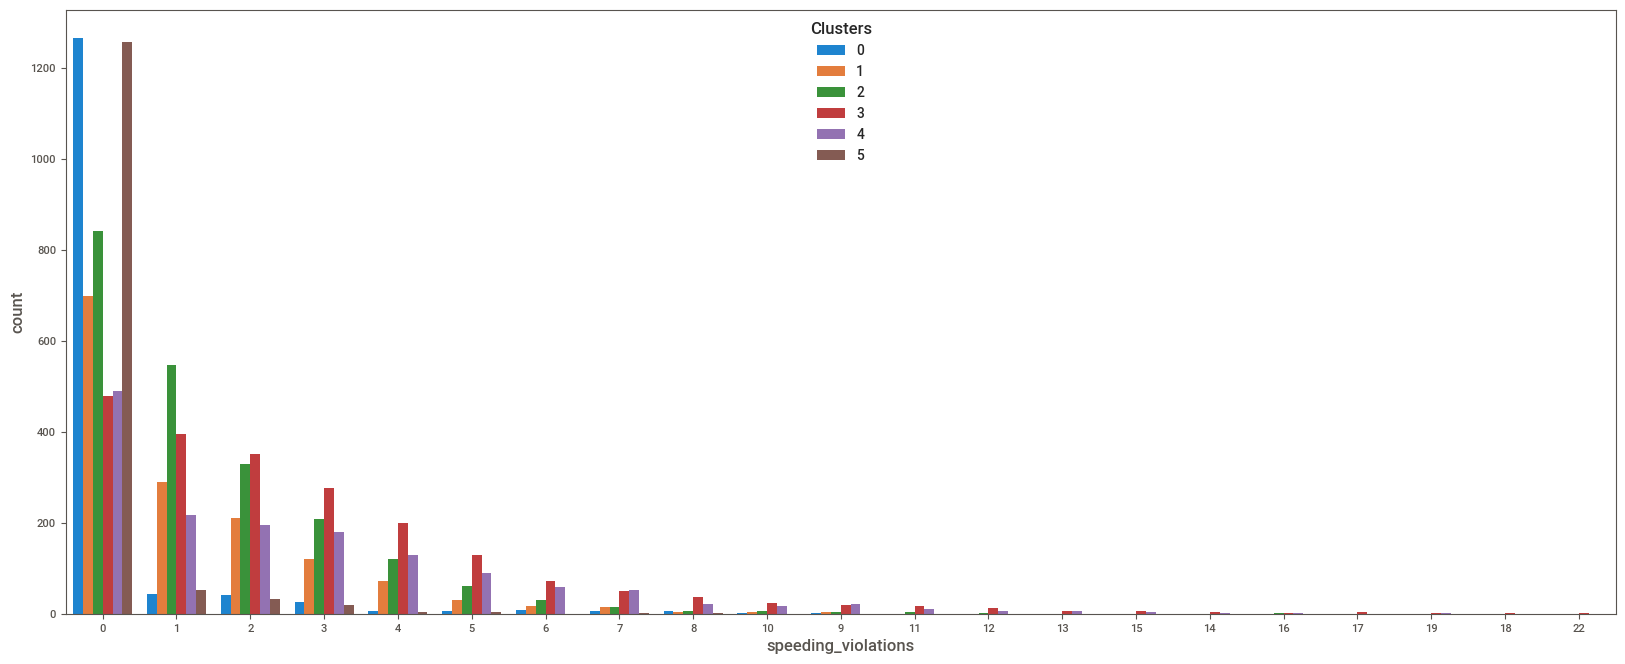

In [245]:
plt.subplots(figsize = (20,8))
sns.countplot(x=AutoCustomer_df['speeding_violations'],order=AutoCustomer_df['speeding_violations'].value_counts().index,hue=AutoCustomer_df['Clusters'])
plt.show()

Cluster 0- Customers with really low count of speeding violations. Some report of at least 1 but not more than 8.

Cluster 1- Customers with low count of speeding violations. Some report of at least 1 but not more than 9.

Cluster 2- Customers with low count of speeding violations. Some report of at least 1 but not more than 11.

Cluster 3- Customers with low count of speeding violations. Some report of at least 1 but not more than 17. Cluster contains customers with the more speeding violation.

Cluster 4- Customers with low count of speeding violations. Some report of at least 1 but not more than 15.

Cluster 5- Customers with really low count of speeding violations. Some report of at least 1 but not more than 5.